In [28]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import squarify
import numpy as np
from matplotlib.patheffects import withStroke
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from matplotlib.colors import LinearSegmentedColormap

In [29]:
PALETA = ["#FEBA17","#14B1D5","#328E6E", "#D91656", "#EB5B00", "#273F4F",]
def set_style(mode='presentacion'):
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    if mode == 'presentacion':
        context = "talk"
        rc = {
            "font.family": "sans-serif",
            "font.sans-serif": ["Arial", "DejaVu Sans"],
            "font.size": 12,
            # titulo
            "figure.titlesize": 38,
            "figure.titleweight": "bold",
            # ejes
            "axes.titlesize": 38,
            "xtick.labelsize": 26,
            "ytick.labelsize": 26,
            "axes.titlepad": 10,
            "axes.facecolor": "#F5F5DC",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "axes.edgecolor": "#333333",
            "axes.grid": True,
            # ejes rejilla
            "grid.color": "#222",
            "grid.linestyle": "--",
            "grid.linewidth": 1.5,
            "grid.alpha": 0.5,
            # ejes etiquetas
            "axes.labelsize": 2,
            # pad entre eje y etiquetas de valores
            "xtick.major.pad": 15,
            "ytick.major.pad": 15,
            # pad entre el nombre del eje y los ticks
            "axes.labelpad": 20,
            # leyenda
            "legend.fontsize": 18,
            "legend.title_fontsize": 20,
            "legend.labelspacing": 1.5,
            "legend.handlelength": 2,
            "legend.handleheight": 0.5,
            "legend.borderpad": 0.5,
            "legend.borderaxespad": 0.5,
            "legend.markerscale": 1.5,
            "legend.framealpha": 0.8,
            "legend.loc": "best",
            "legend.facecolor": "#F5F5DC",
            "legend.shadow": True,
            "legend.edgecolor": "#333333",
            "legend.frameon": True,
            # fondo
            "figure.facecolor": "#F5F5DC",
            # figura resolucion y tamaño
            "figure.dpi": 250,
            "figure.figsize": (12, 8)
            }
    elif mode == 'reporte':
        context = "notebook"
        rc = {
            "font.family": "sans-serif",
            "font.sans-serif": ["Arial", "DejaVu Sans"],
            "font.size": 12,
            # titulo
            "figure.titlesize": 25,
            "figure.titleweight": "bold",
            # ejes
            "axes.titlesize": 22,
            "xtick.labelsize": 18,
            "ytick.labelsize": 18,
            "axes.titlepad": 14,
            "axes.facecolor": "#F5F5DC",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "axes.edgecolor": "#333333",
            "axes.grid": True,
            # ejes rejilla
            "grid.color": "#222",
            "grid.linestyle": "--",
            "grid.linewidth": 1.5,
            "grid.alpha": 0.5,
            # ejes etiquetas
            "axes.labelsize": 22,
            # pad entre eje y etiquetas de valores
            "xtick.major.pad": 15,
            "ytick.major.pad": 15,
            # pad entre el nombre del eje y los ticks
            "axes.labelpad": 15,
            # leyenda
            "legend.fontsize": 14,
            "legend.title_fontsize": 16,
            "legend.labelspacing": 1.5,
            "legend.handlelength": 2,
            "legend.handleheight": 0.5,
            "legend.borderpad": 0.5,
            "legend.borderaxespad": 0.5,
            "legend.markerscale": 1.5,
            "legend.framealpha": 0.8,
            "legend.loc": "best",
            "legend.facecolor": "#F5F5DC",
            "legend.shadow": True,
            "legend.edgecolor": "#333333",
            "legend.frameon": True,
            # fondo
            "figure.facecolor": "#F5F5DC",
            # figura resolucion y tamaño
            "figure.dpi": 180,
            "figure.figsize": (12, 8)
            }
    else:
        raise ValueError("Modo desconocido. Use 'presentacion' o 'reporte'.")

    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)

# Ejemplo de uso:
set_style('presentacion')
# set_style('reporte')


In [30]:
def execute_query(query):
    """
    Ejecuta una consulta SQL sobre la base de datos 'im.db' y devuelve los resultados en un DataFrame.

    Parámetros:
        query (str): La consulta SQL a ejecutar.

    Retorna:
        pd.DataFrame: Un DataFrame con los resultados de la consulta.
    """
    conn = sqlite3.connect('im.db')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

In [31]:
# Consulta SQL para obtener la cantidad de títulos de animación por año
query = """
SELECT 
    CAST(startYear AS INTEGER) AS year,
    COUNT(tconst) AS total_animated_movies
FROM 
    titles
WHERE 
    startYear IS NOT NULL
    AND CAST(startYear AS INTEGER) <= 2024  -- Solo años hasta 2026
GROUP BY 
    year
ORDER BY 
    year;
"""

df = execute_query(query)


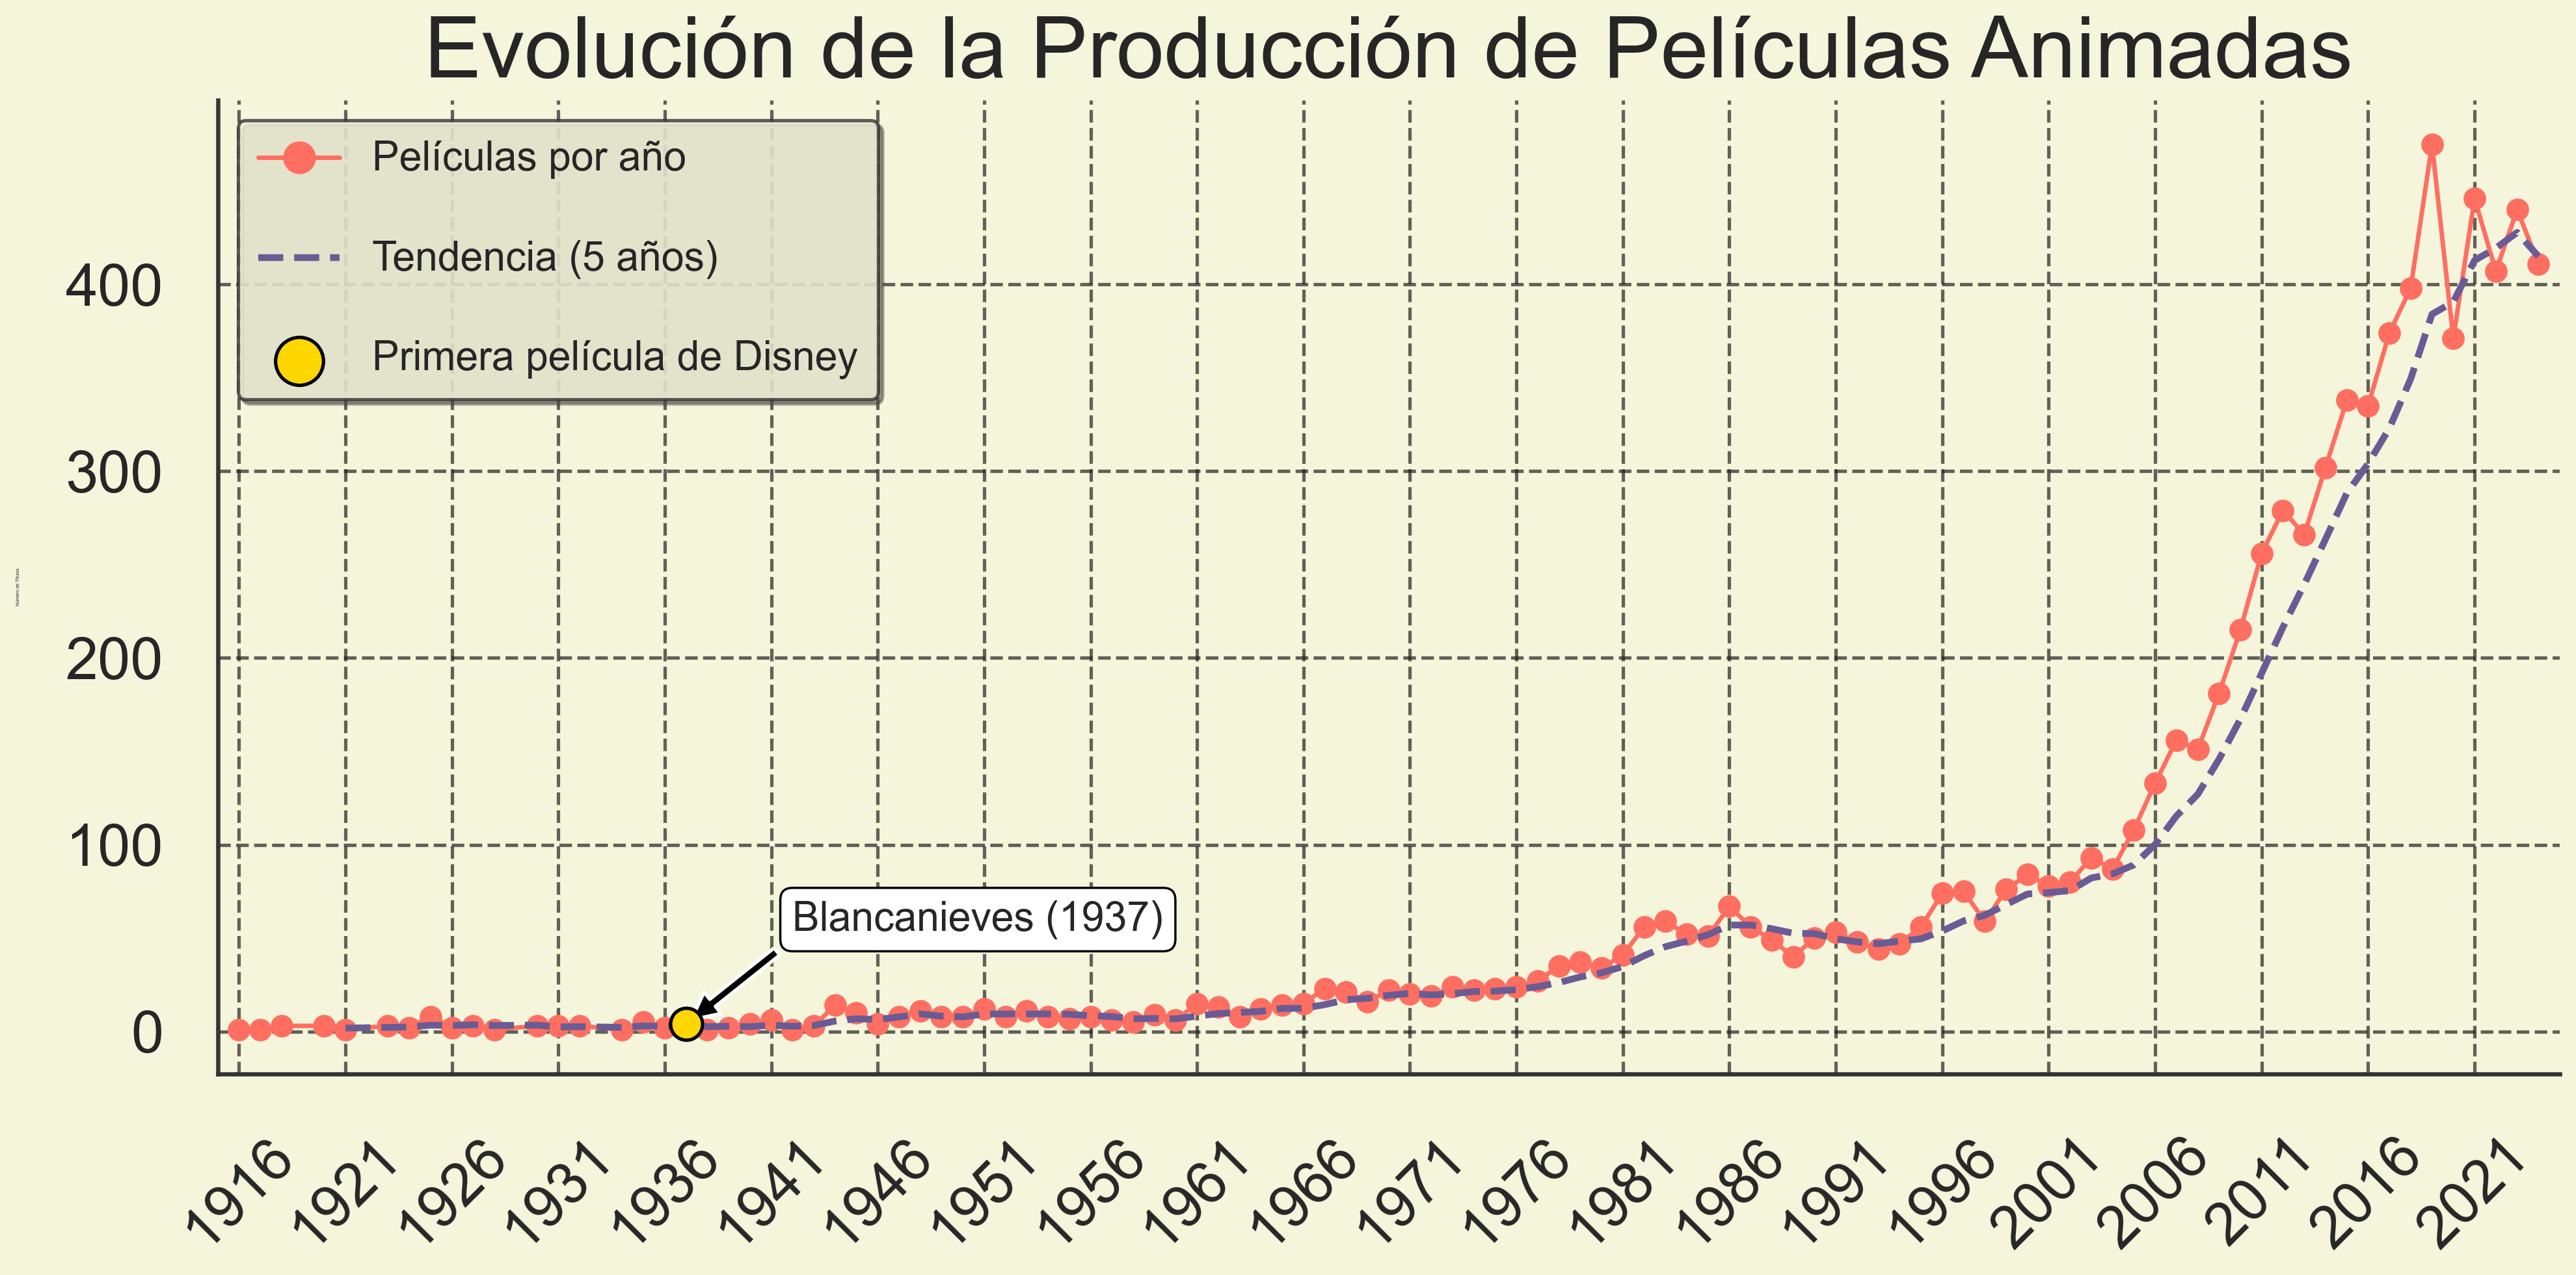

In [32]:
# Grafica 
plt.figure(figsize=(16, 8))
plt.plot(df['year'], df['total_animated_movies'], 
         marker='o', linestyle='-', color='#FF6F61', linewidth=2, 
         label='Películas por año')

min_year = df['year'].min()
max_year = df['year'].max()
plt.xticks(np.arange(min_year, max_year+1, 5), rotation=45)  # Marcas cada 5 años

plt.title('Evolución de la Producción de Películas Animadas')
plt.ylabel('Número de Títulos')
plt.grid(True, linestyle='--', alpha=0.7)

# Media móvil con ventana de 5 años
window_size = 5
df['moving_avg'] = df['total_animated_movies'].rolling(window=window_size).mean()
plt.plot(df['year'], df['moving_avg'], 
         linestyle='--', color='#6B5B95', linewidth=3, 
         label=f'Tendencia ({window_size} años)')

# Añadir punto para la primera película de Disney (1937)
disney_year = 1937
# Buscar el valor correspondiente a 1937 en el DataFrame
disney_value = df[df['year'] == disney_year]['total_animated_movies'].values[0]

plt.scatter(disney_year, disney_value, color='gold', s=200, 
            label='Primera película de Disney', 
            edgecolors='black', zorder=5)
plt.annotate('Blancanieves (1937)', 
             xy=(disney_year, disney_value), 
             xytext=(disney_year+5, disney_value+50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=18, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Mejorar el formato del eje X
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
plt.gca().set_xlim(left=min_year-1, right=max_year+1)

plt.legend()
plt.tight_layout()
plt.show()

In [33]:
import sqlite3
import pandas as pd

# Diccionario completo de regiones
region_dict = {
    'CA': 'Canada',
    'XWW': 'Worldwide',
    'HU': 'Hungary',
    'AR': 'Argentina',
    'UA': 'Ukraine',
    'ES': 'Spain',
    'IT': 'Italy',
    'US': 'United States',
    'AU': 'Australia',
    'DE': 'Germany',
    'EC': 'Ecuador',
    'JP': 'Japan',
    'CSHH': 'Czechoslovakia (historical)',
    'FR': 'France',
    'GR': 'Greece',
    'SE': 'Sweden',
    'NO': 'Norway',
    'FI': 'Finland',
    'PL': 'Poland',
    'SUHH': 'Soviet Union (historical)',
    'GB': 'United Kingdom',
    'BR': 'Brazil',
    'PT': 'Portugal',
    'HR': 'Croatia',
    'RS': 'Serbia',
    'AT': 'Austria',
    'XYU': 'Former Yugoslavia',
    'MX': 'Mexico',
    'RU': 'Russia',
    'NL': 'Netherlands',
    'DK': 'Denmark',
    'IS': 'Iceland',
    'BE': 'Belgium',
    'SG': 'Singapore',
    'ZA': 'South Africa',
    'BO': 'Bolivia',
    'DO': 'Dominican Republic',
    'PE': 'Peru',
    'VE': 'Venezuela',
    'UY': 'Uruguay',
    'BA': 'Bosnia and Herzegovina',
    'XWG': 'Western Europe (general)',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'EG': 'Egypt',
    'KZ': 'Kazakhstan',
    'AZ': 'Azerbaijan',
    'RO': 'Romania',
    'PR': 'Puerto Rico',
    'AL': 'Albania',
    'IE': 'Ireland',
    'VN': 'Vietnam',
    'UZ': 'Uzbekistan',
    'TR': 'Turkey',
    'IR': 'Iran',
    'IL': 'Israel',
    'CZ': 'Czechia',
    'IN': 'India',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'MY': 'Malaysia',
    'TH': 'Thailand',
    'KR': 'South Korea',
    'BG': 'Bulgaria',
    'TW': 'Taiwan',
    'CN': 'China',
    'PH': 'Philippines',
    'HK': 'Hong Kong',
    'ID': 'Indonesia',
    'XEU': 'European Union',
    'BY': 'Belarus',
    'DDDE': 'East Germany (historical)',
    'CL': 'Chile',
    'EE': 'Estonia',
    'YUCS': 'Yugoslavia (historical)',
    'GE': 'Georgia',
    'CR': 'Costa Rica',
    'CH': 'Switzerland',
    'NZ': 'New Zealand',
    'LU': 'Luxembourg',
    'BJ': 'Benin',
    'CO': 'Colombia',
    'CU': 'Cuba',
    'AM': 'Armenia',
    'PA': 'Panama',
    'AE': 'United Arab Emirates',
    'MK': 'North Macedonia',
    'JM': 'Jamaica',
    'XAS': 'Asia (general)',
    'BD': 'Bangladesh',
    'NG': 'Nigeria',
    'PK': 'Pakistan',
    'XSA': 'South Asia (general)',
    'XKO': 'Kosovo',
    'TO': 'Tonga',
    'TJ': 'Tajikistan',
    'MN': 'Mongolia',
    'DZ': 'Algeria',
    'LB': 'Lebanon',
    'MA': 'Morocco',
    'QA': 'Qatar',
    'SY': 'Syria',
    'TN': 'Tunisia',
    'XPI': 'Pacific Islands (general)',
    'LI': 'Liechtenstein',
    'MZ': 'Mozambique',
    'MD': 'Moldova',
    'LK': 'Sri Lanka',
    'BF': 'Burkina Faso',
    'CG': 'Congo',
    'CI': 'Ivory Coast',
    'CM': 'Cameroon',
    'SN': 'Senegal',
    'KP': 'North Korea',
    'KG': 'Kyrgyzstan',
    'PY': 'Paraguay',
    'SV': 'El Salvador',
    'GT': 'Guatemala',
    'NP': 'Nepal',
    'TM': 'Turkmenistan',
    'IQ': 'Iraq',
    'GL': 'Greenland',
    'ZW': 'Zimbabwe',
    'CSXX': 'Serbia and Montenegro (historical)',
    'SA': 'Saudi Arabia',
    'MC': 'Monaco',
    'ET': 'Ethiopia',
    'MU': 'Mauritius',
    'TT': 'Trinidad and Tobago',
    'KW': 'Kuwait',
    'ME': 'Montenegro',
    'MO': 'Macau',
    'KE': 'Kenya',
    'GH': 'Ghana',
    'AF': 'Afghanistan',
    'JO': 'Jordan',
    'BH': 'Bahrain',
    'SM': 'San Marino',
    'PS': 'Palestine',
    'CY': 'Cyprus',
    'UG': 'Uganda',
    'HN': 'Honduras',
    'MQ': 'Martinique',
    'BT': 'Bhutan',
    'SZ': 'Eswatini',
    'XKV': 'Kosovo (alternate)',
    'BS': 'Bahamas'
}

def get_movies_by_region_and_year(db_path, target_years, region_dict):
    """
    Obtiene un DataFrame en formato ancho con conteo de películas por región y año.
    
    Args:
        db_path (str): Ruta al archivo de base de datos SQLite
        target_years (list): Lista de años a consultar
        region_dict (dict): Diccionario de mapeo de códigos de región a nombres
        
    Returns:
        pd.DataFrame: DataFrame con regiones como índice y años como columnas
    """
    conn = sqlite3.connect(db_path)
    
    query = """
    SELECT 
        r.region_code,
        t.startYear as year,
        COUNT(*) as count
    FROM 
        titles t
    JOIN 
        title_regions tr ON t.tconst = tr.tconst
    JOIN 
        regions r ON tr.region_id = r.id
    WHERE 
        t.startYear IN ({})
    GROUP BY 
        r.region_code, t.startYear
    """.format(','.join(map(str, target_years)))
    
    # Ejecutar la consulta
    df = pd.read_sql_query(query, conn)
    conn.close()
    
    # Mapear códigos de región a nombres completos
    df['Region'] = df['region_code'].map(region_dict)
    df.drop('region_code', axis=1, inplace=True)
    
    pivot_df = df.pivot(index='Region', columns='year', values='count').fillna(0)
    
    pivot_df.columns = pivot_df.columns.astype(int)
    pivot_df = pivot_df[sorted(pivot_df.columns)]
    
    pivot_df['Total'] = pivot_df.sum(axis=1)
    pivot_df = pivot_df.sort_values('Total', ascending=False)
    
    pivot_df = pivot_df.astype(int)
    
    pivot_df.index.name = None
    
    return pivot_df

# Años objetivo
target_years = [1975, 1995, 2010, 2024]

# Obtener el DataFrame
movies_df = get_movies_by_region_and_year('im.db', target_years, region_dict)
movies_df = movies_df.reset_index().rename(columns={'index': 'regions'})
movies_df.head(20)


year         regions  1975  1995  2010  2024  Total
0      United States    15    32   137   229    413
1     United Kingdom    12    24    96   139    271
2             Canada     5    22    59   156    242
3              Japan     7    30    79   123    239
4            Germany     2    20    57   125    204
5             Russia     2    20    69   103    194
6             France     7    17    50   101    175
7          Australia     4    11    34   123    172
8          Worldwide     5    17    71    76    169
9              India     3    11    44   110    168
10             Italy     8    18    42    91    159
11             Spain     7    17    40    93    157
12            Brazil     7    15    45    73    140
13            Taiwan     1    14    36    81    132
14            Mexico     5    12    29    79    125
15            Poland     2    13    40    59    114
16           Hungary     6    12    29    60    107
17           Ukraine     4    13    36    54    107
18             China     0     8    31    63    102
19            Sweden     6    11    32    50     99

In [34]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=1975,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={1975: "Número de películas"}
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='rgba(0,0,0,0)',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [35]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=1975,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={1975: "Número de películas"}
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='#F5F5DC',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='#F5F5DC',
    plot_bgcolor='#F5F5DC'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [36]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=2010,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={2010: "Número de películas"}
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='#F5F5DC',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='#F5F5DC',
    plot_bgcolor='#F5F5DC'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [37]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=2024,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={2024: "Número de películas"}
)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='rgba(0,0,0,0)',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [38]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=2024,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={2024: "Número de películas"}
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='#F5F5DC',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='#F5F5DC',
    plot_bgcolor='#F5F5DC'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [39]:
non_country_regions = [
    "Worldwide", "European Union", "Western Europe", "Former Yugoslavia",
    "Soviet Union", "Czechoslovakia", "East Germany", "Pacific Islands",
    "Asia", "South Asia", "Kosovo", "Serbia and Montenegro", "Yugoslavia"
]
countries_df = movies_df[~movies_df.index.isin(non_country_regions)]
countries_df = countries_df.reset_index().rename(columns={"regions": "Country"})
fig = px.choropleth(
    countries_df,
    locations="Country",
    locationmode="country names",
    color=2024,
    hover_name="Country",
    color_continuous_scale='Purp',
    title="<b>Películas Producidas por País</b>",
    labels={2024: "Número de películas"}
)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=45, family="Arial", color="black"),
    height=800,
    width=1400,
    margin=dict(l=0, r=0, t=80, b=0),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='rgba(0,0,0,0)',
        coastlinecolor='rgba(0, 0, 0, 1)',
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_layout(
    coloraxis_colorbar_title_font_size=28,
    coloraxis_colorbar_tickfont_size=25
)
fig.show()


In [40]:
# Traducción de géneros a español
genre_translation = {
    'Comedy': 'Comedia',
    'Drama': 'Drama',
    'History': 'Histórico',
    'Adventure': 'Aventura',
    'Family': 'Familiar',
    'Fantasy': 'Fantasía',
    'Documentary': 'Documental',
    'Musical': 'Musical',
    'Romance': 'Romance',
    'Music': 'Música',
    'Horror': 'Terror',
    'Sci-Fi': 'Ciencia Ficción',
    'Action': 'Acción',
    'Sport': 'Deportes',
    'Crime': 'Crimen',
    'Biography': 'Biografía',
    'War': 'Bélico',
    'Western': 'Western',
    'Thriller': 'Thriller',  
    'Mystery': 'Misterio',
    'Adult': 'Adulto',
    'News': 'Noticias',
    'Game-Show': 'Game-Show',
    'Talk-Show': 'Talk-Show'
}

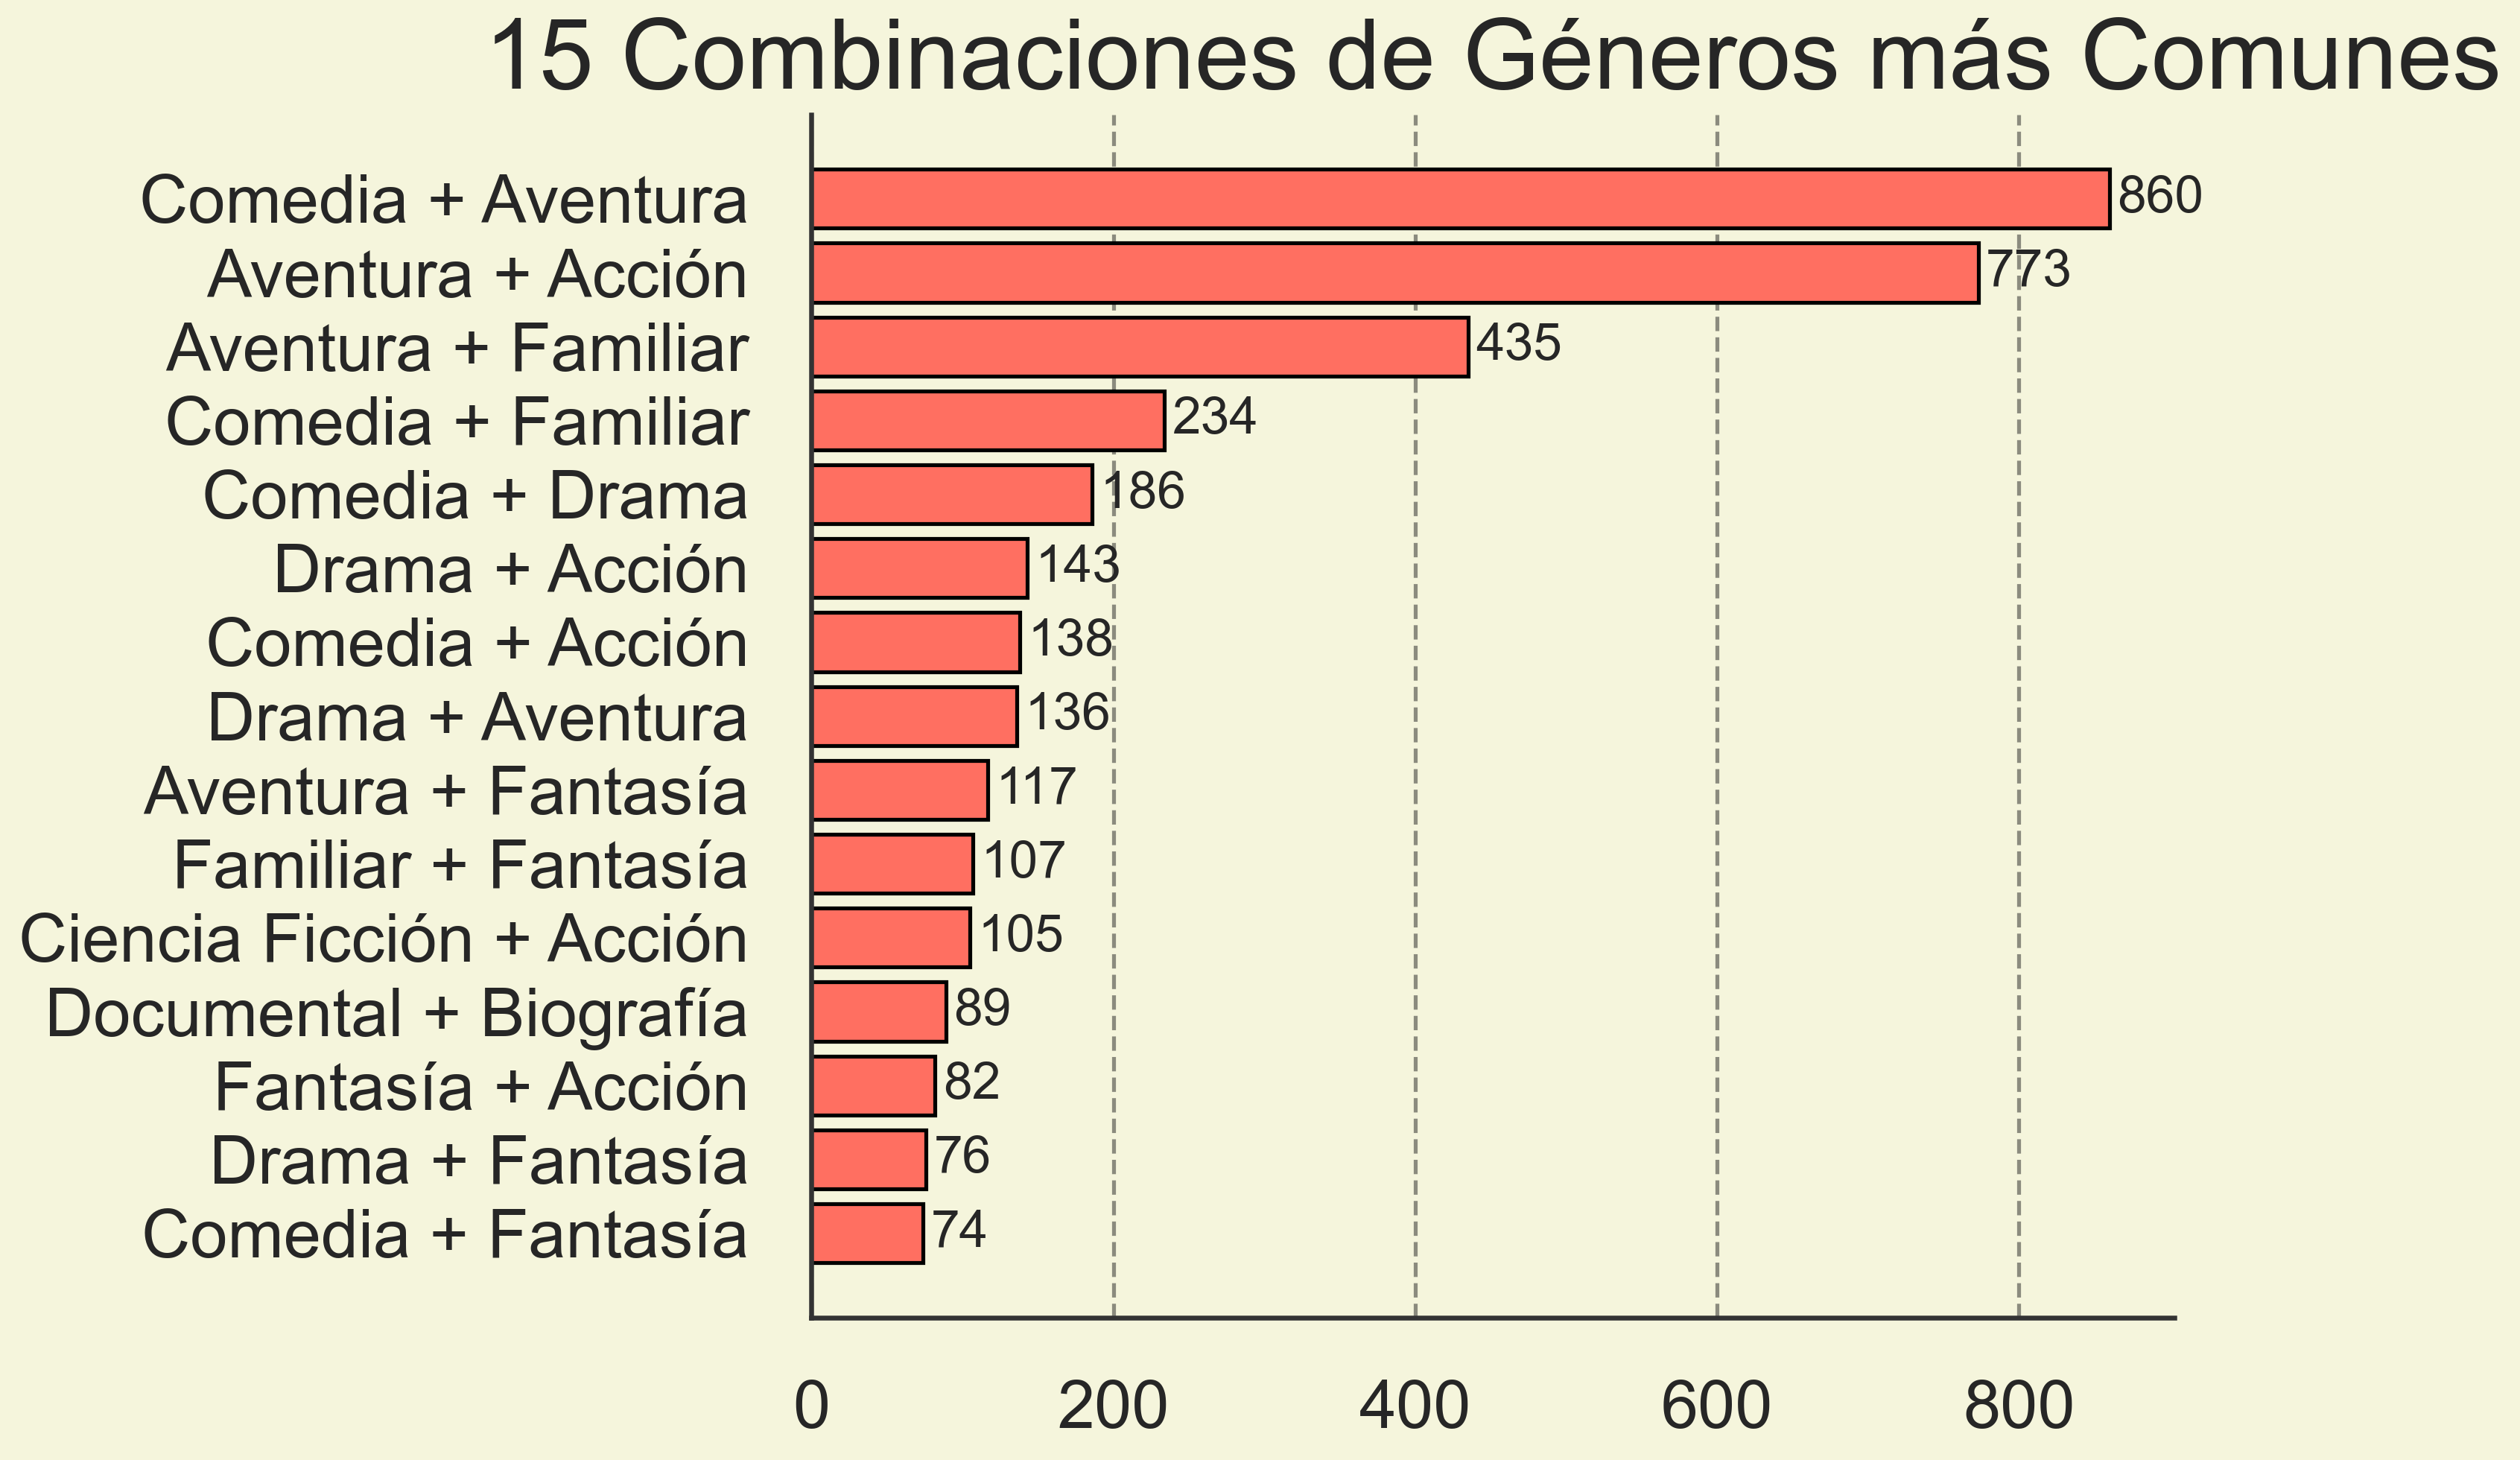

In [41]:
# Consulta para obtener todas las combinaciones de géneros
query = """
SELECT 
    tg1.tconst,
    g1.genre_name AS genre1,
    g2.genre_name AS genre2
FROM 
    title_genres tg1
JOIN 
    title_genres tg2 ON tg1.tconst = tg2.tconst AND tg1.genre_id < tg2.genre_id
JOIN 
    genres g1 ON tg1.genre_id = g1.id
JOIN 
    genres g2 ON tg2.genre_id = g2.id
JOIN
    titles t ON tg1.tconst = t.tconst
WHERE
    t.startYear IS NOT NULL
"""

df = execute_query(query)


# Traducir géneros al español
df['genre1'] = df['genre1'].map(genre_translation)
df['genre2'] = df['genre2'].map(genre_translation)

# Contar frecuencia de combinaciones
genre_pairs = df.groupby(['genre1', 'genre2']).size().reset_index(name='count')

top_combinations = genre_pairs.sort_values('count', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_combinations['genre1'] + " + " + top_combinations['genre2'], 
               top_combinations['count'], 
               color='#FF6F61',edgecolor='black')
plt.gca().invert_yaxis()
plt.title('15 Combinaciones de Géneros más Comunes')
plt.bar_label(bars, padding=3, fontsize=20)
plt.grid(axis='y',visible=False)

plt.tight_layout()
plt.show()

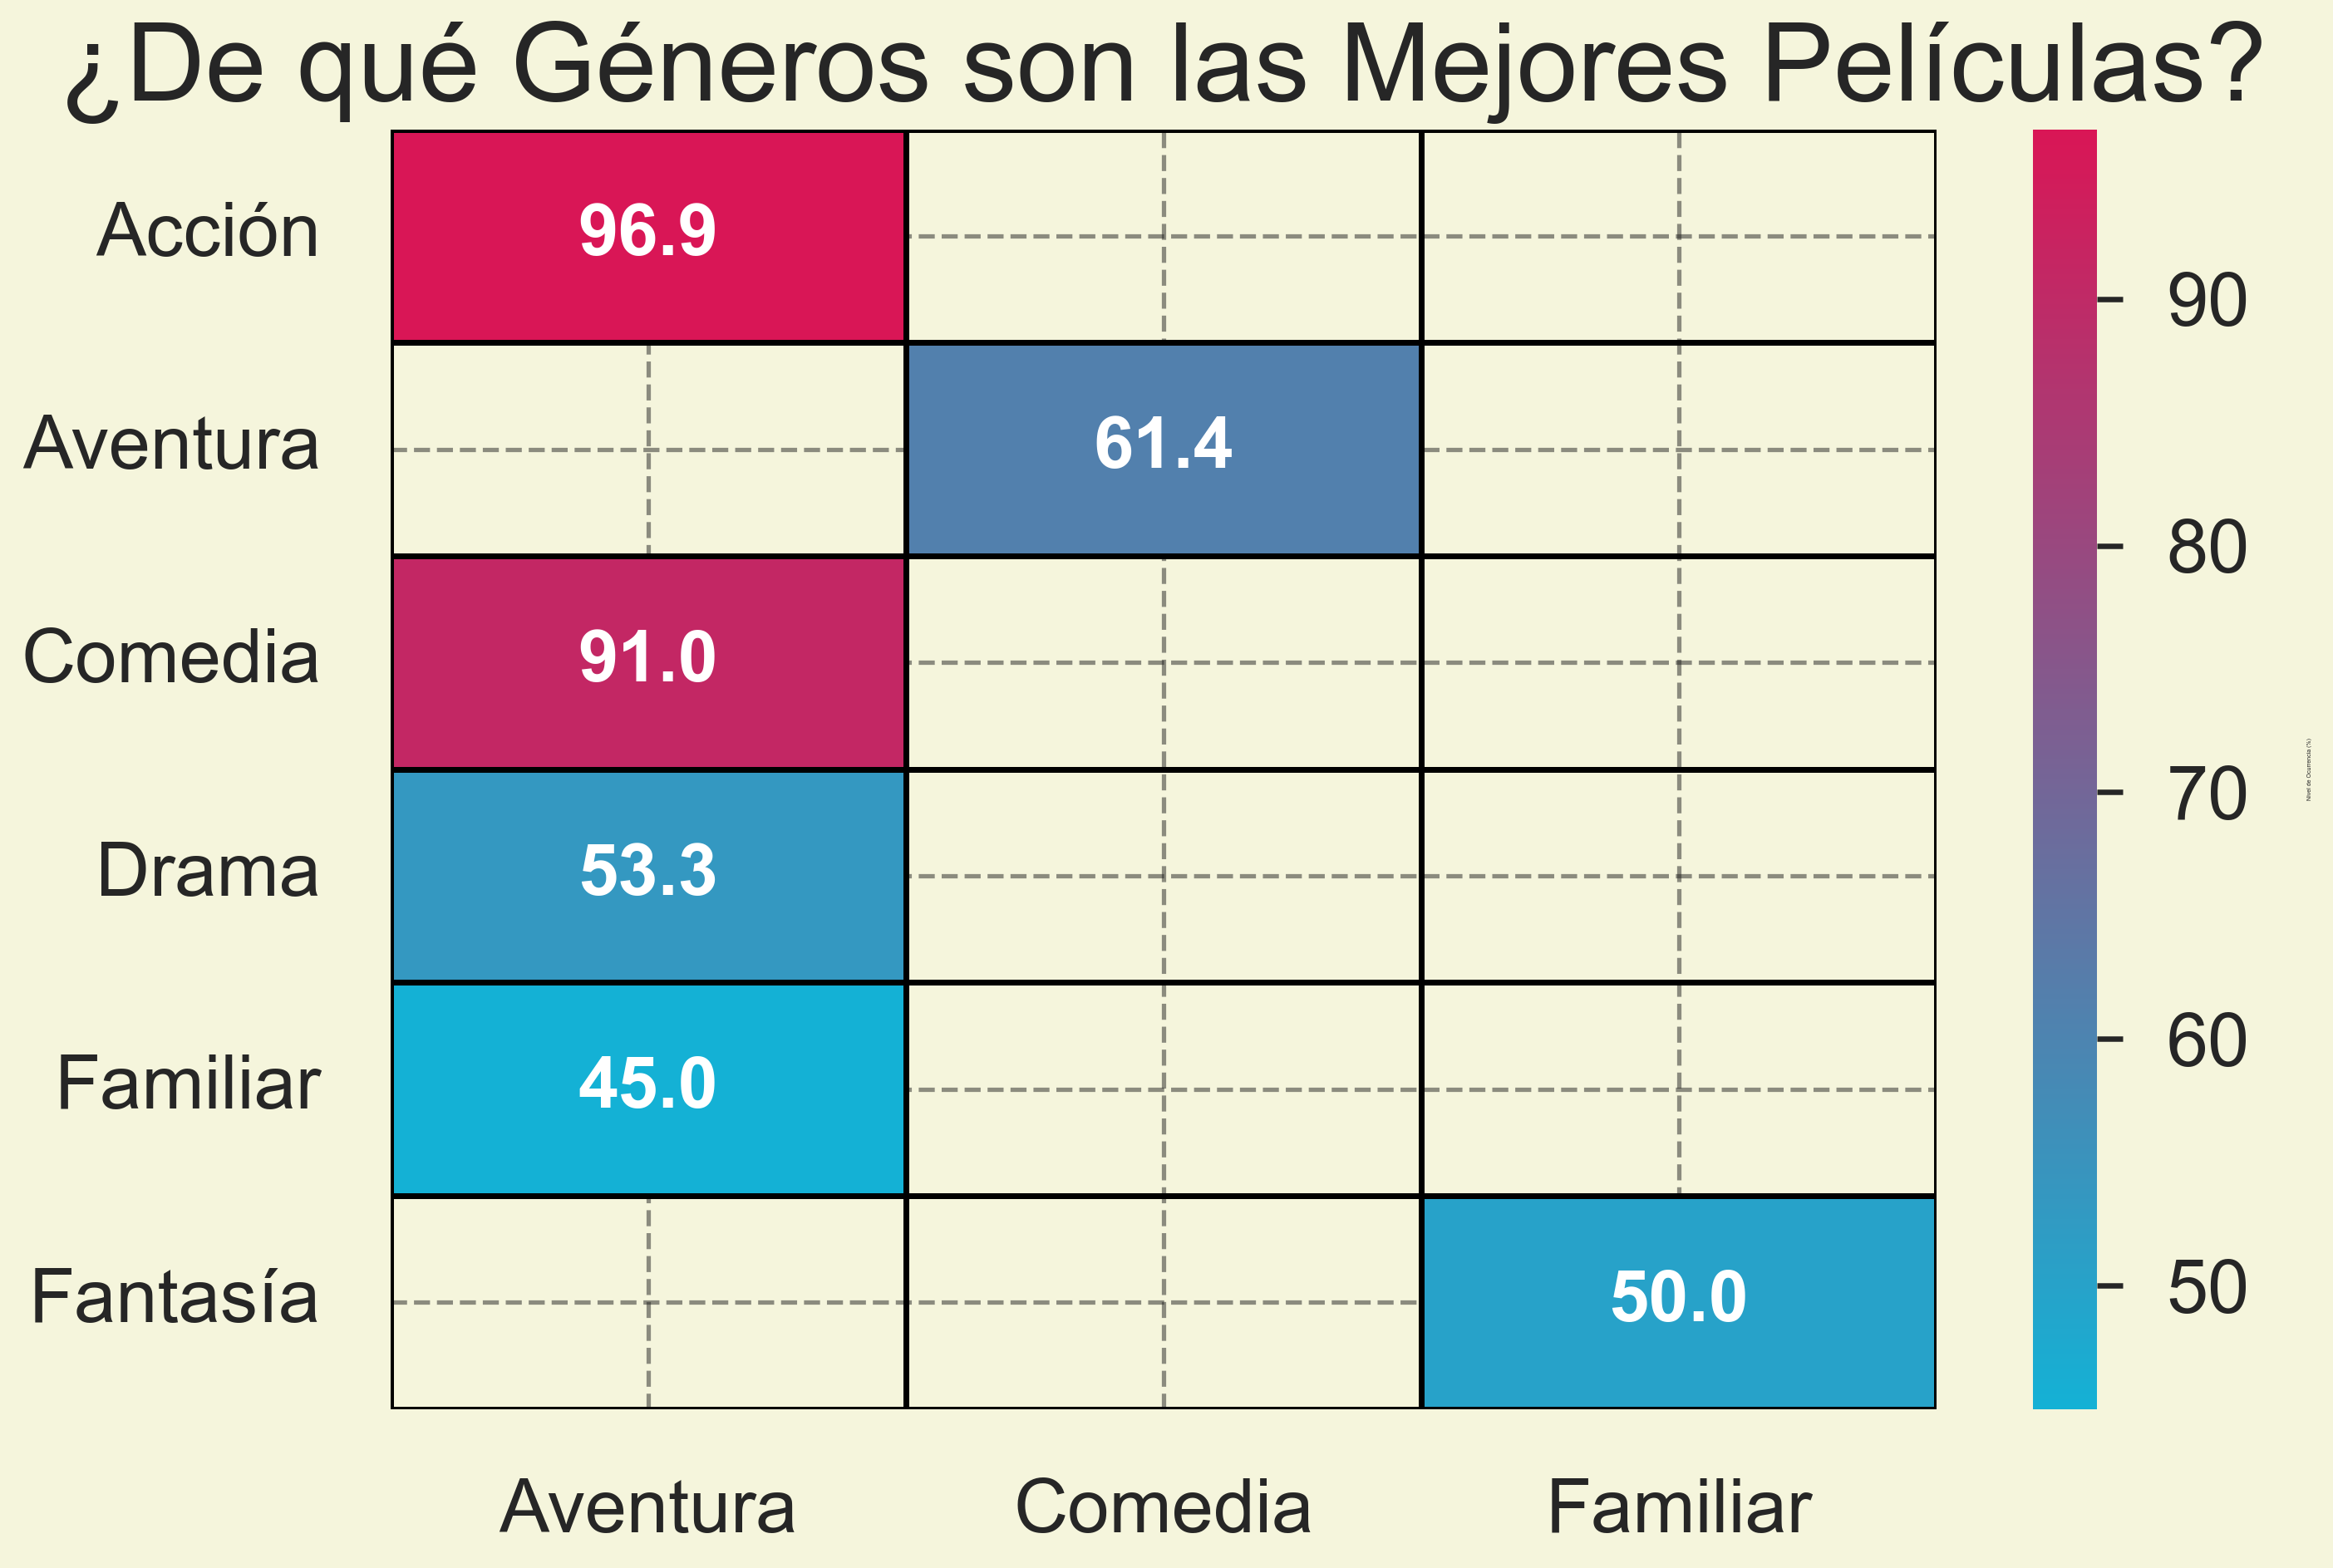

In [42]:
df = execute_query("""
SELECT
    t.tconst,
    g.genre_name,
    t.primaryTitle,
    t.originalTitle,
    t.startYear,
    t.isAdult,
    t.averageRating,
    t.numVotes,
    t.runtimeMinutes
FROM title_genres AS tg
JOIN genres AS g ON tg.genre_id = g.id
JOIN titles AS t ON tg.tconst = t.tconst
ORDER BY t.numVotes DESC
LIMIT 300
""")
df['genre_name'] = df['genre_name'].map(genre_translation)

transactions = df.groupby('tconst')['genre_name'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules = rules.sort_values(['lift', 'confidence'], ascending=False)
rules = rules[['antecedents', 'consequents', 'confidence']].copy()
rules['antecedents'] = rules['antecedents'].apply(lambda s: ', '.join(sorted(s)))
rules['consequents'] = rules['consequents'].apply(lambda s: ', '.join(sorted(s)))
rules['confidence'] = rules['confidence'] * 100
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='confidence')
# Definir los dos colores para la cmap
color1 = PALETA[1]  # primer color elegido
color2 = PALETA[3]  # segundo color elegido

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1, color2])

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap=custom_cmap,
    cbar_kws={'label': 'Nivel de Ocurrencia (%)'},
    linewidths=2.0,
    linecolor='black',
    annot_kws={'size': 25, 'color': 'white', 'weight': 'bold'}
)
plt.xlabel('')
plt.ylabel('')
plt.title('¿De qué Géneros son las Mejores Películas?')
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_8944\955949647.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\marti\AppData\Local\Temp\ipykernel_8944\955949647.py:25: UserWarning:


The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.



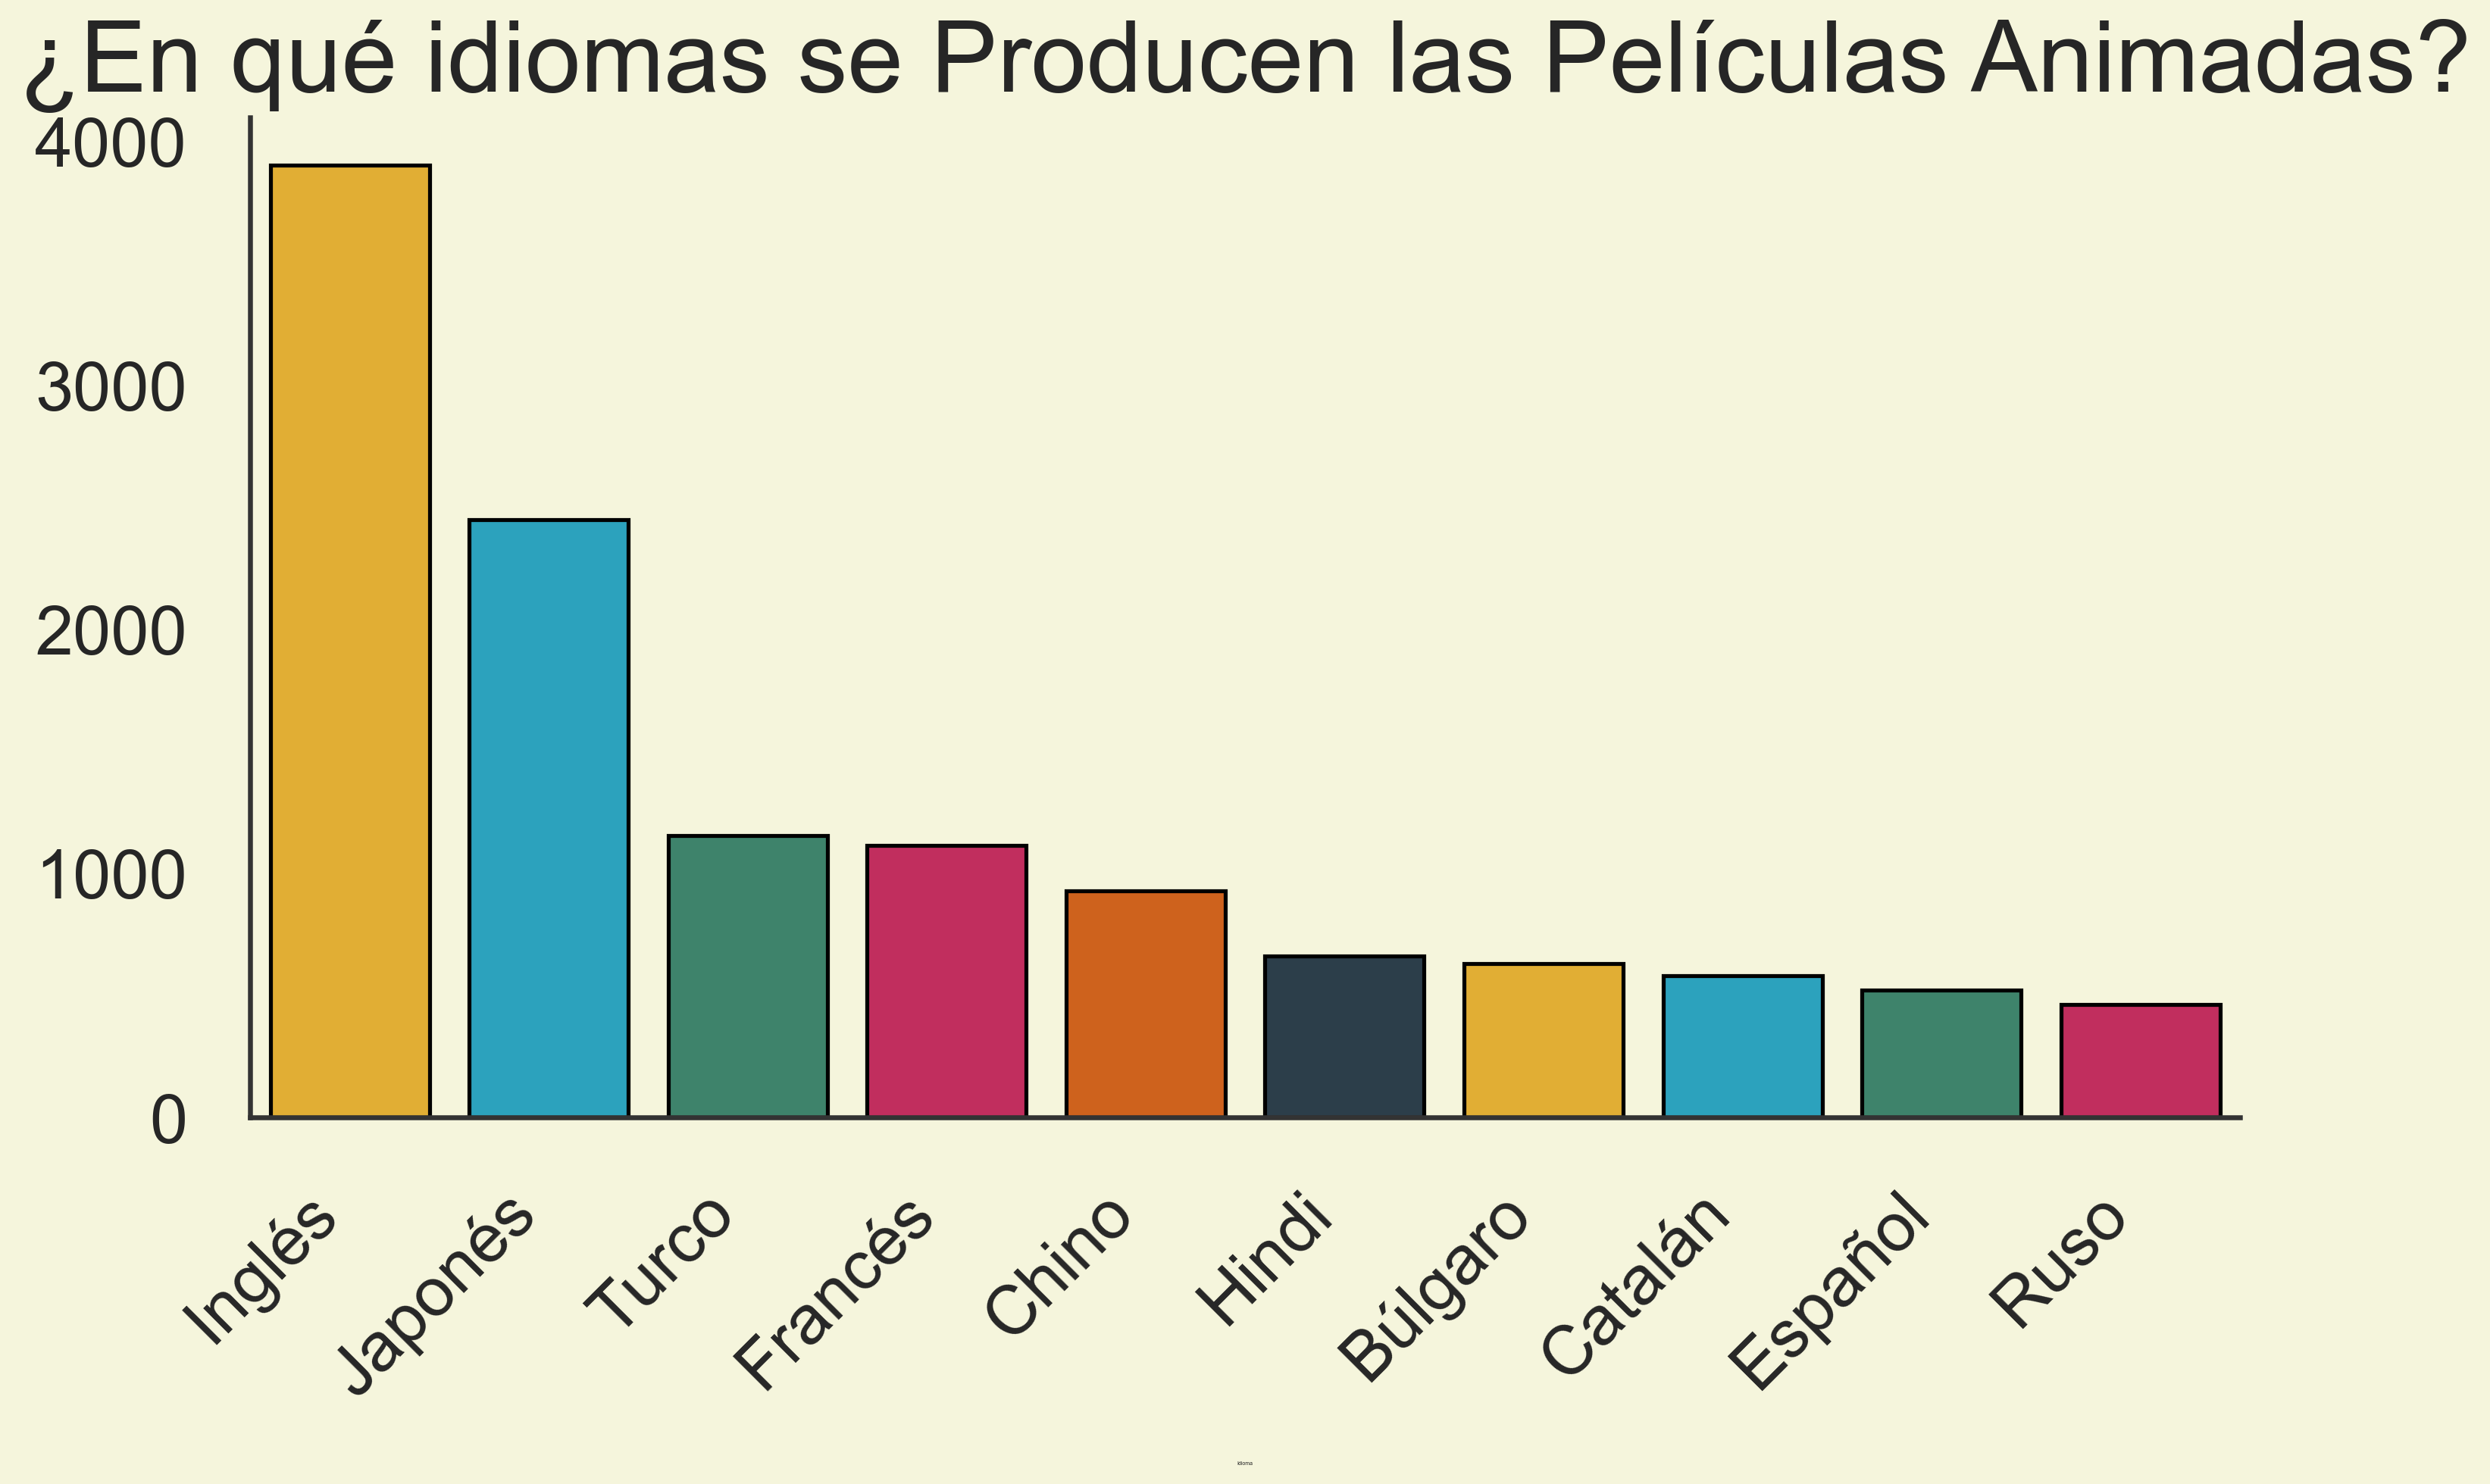

In [43]:
df = execute_query("""
SELECT
    t.tconst,
    t.averageRating,
    l.language_code
FROM title_languages AS tl
JOIN languages AS l ON tl.language_id = l.id
JOIN titles AS t ON tl.tconst = t.tconst
""")
# Mostrar solo los 10 idiomas con más películas
language_mapping = {
    'en': 'Inglés',
    'ja': 'Japonés',
    'tr': 'Turco',
    'fr': 'Francés',
    'cmn': 'Chino',
    'hi': 'Hindi',
    'bg': 'Búlgaro',
    'ca': 'Catalán',
    'es': 'Español',
    'ru': 'Ruso'
}
df['language_code'] = df['language_code'].map(language_mapping)
top_10 = df['language_code'].value_counts().nlargest(10).index
sns.countplot(data=df, x='language_code', palette=PALETA, order=top_10,edgecolor='black')
plt.title('¿En qué idiomas se Producen las Películas Animadas?')
plt.xlabel('Idioma')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', visible=False)
plt.tight_layout()
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_8944\3013270625.py:69: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



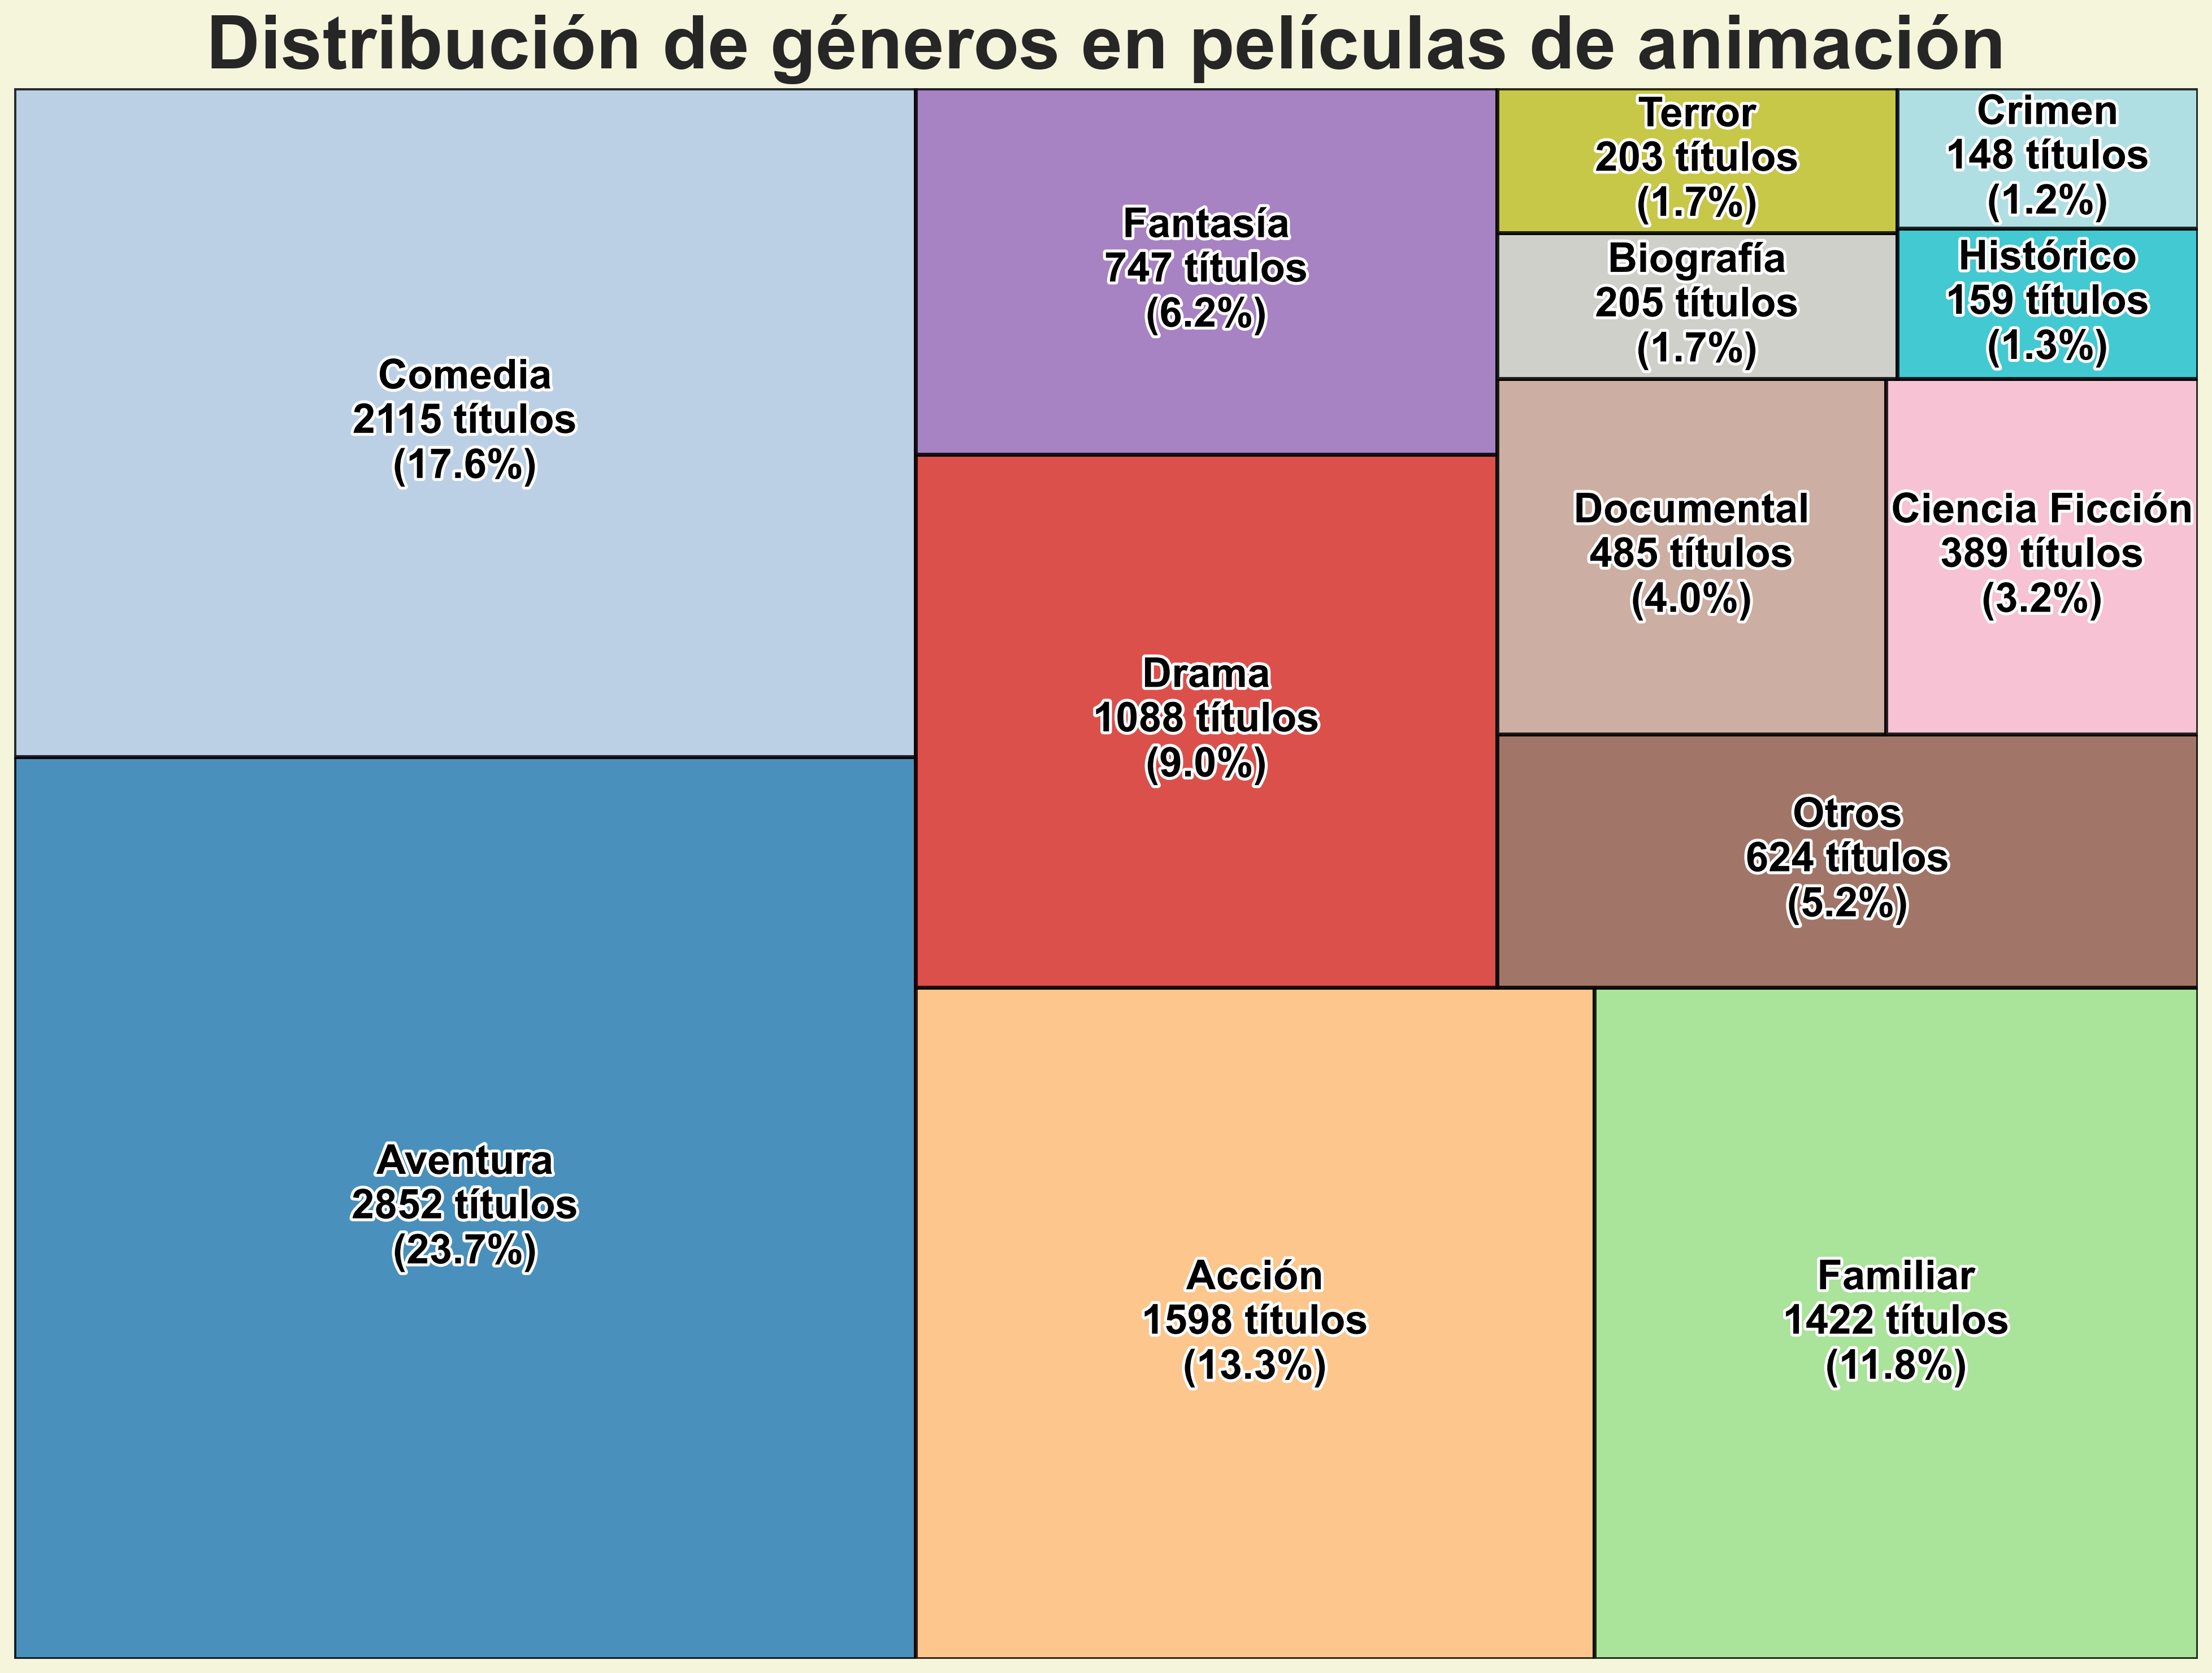

In [44]:
query = """
SELECT 
    g.genre_name AS 'Género',
    COUNT(DISTINCT tg.tconst) AS 'frecuencia'
FROM title_genres tg
JOIN genres g ON tg.genre_id = g.id
GROUP BY g.genre_name
ORDER BY COUNT(DISTINCT tg.tconst) DESC
"""
df = execute_query(query)
traduccion_generos = {
    'Comedy': 'Comedia',
    'Drama': 'Drama',
    'History': 'Histórico',
    'Adventure': 'Aventura',
    'Family': 'Familiar',
    'Fantasy': 'Fantasía',
    'Documentary': 'Documental',
    'Musical': 'Musical',
    'Romance': 'Romance',
    'Music': 'Música',
    'Action': 'Acción',
    'Sci-Fi': 'Ciencia Ficción',
    'Thriller': 'Suspenso',
    'Horror': 'Terror',
    'Crime': 'Crimen',
    'Biography': 'Biografía',
    'Animation': 'Animación',
    'War': 'Bélico',
    'Sport': 'Deportes',
    'Western': 'Western',
    'Mystery': 'Misterio',
    'Film-Noir': 'Cine Negro'
}

# Traducir géneros
df['Género'] = df['Género'].map(traduccion_generos).fillna(df['Género'])

# Procesamiento de datos
if not df.empty:
    # Calcular porcentajes
    total = df['frecuencia'].sum()
    df['porcentaje'] = (df['frecuencia'] / total) * 100
    
    # Umbral para agrupar géneros menores
    umbral = df['frecuencia'].quantile(0.5)
    
    # Separar géneros principales y menores
    df_principal = df[df['frecuencia'] >= umbral]
    otros_total = df[df['frecuencia'] < umbral]['frecuencia'].sum()
    otros_porcentaje = df[df['frecuencia'] < umbral]['porcentaje'].sum()
    
    # Crear fila de "Otros" si hay géneros menores
    if otros_total > 0:
        otros_row = pd.DataFrame({'Género': ['Otros'], 
                                'frecuencia': [otros_total],
                                'porcentaje': [otros_porcentaje]})
        df_final = pd.concat([df_principal, otros_row])
    else:
        df_final = df_principal
    
    # Ordenar por frecuencia
    df_final = df_final.sort_values('frecuencia', ascending=False)
    
    # Configurar gráfico
    plt.figure(figsize=(16, 12))
    
    # Generar colores
    colores = plt.cm.get_cmap('tab20', len(df_final))
    
    # Crear efecto de borde blanco para el texto
    text_effect = [withStroke(linewidth=3, foreground='white')]
    
    # Crear el treemap con cuadros unidos y texto mejorado
    squarify.plot(
        sizes=df_final['frecuencia'],
        label=df_final.apply(lambda x: f"{x['Género']}\n{x['frecuencia']} títulos\n({x['porcentaje']:.1f}%)", axis=1),
        alpha=0.8,
        color=colores(np.arange(len(df_final))),
        text_kwargs={
            'fontsize':21,  # Tamaño ligeramente aumentado
            'fontweight':'bold',
            'color':'black',
            'path_effects': text_effect  # Borde blanco
        },
        pad=False,  # Mantener los cuadros unidos
        linewidth=2,  # Añadir el grosor del borde
        edgecolor='black'  # Color negro para el contorno
    )
    # Añadir título
    plt.axis('off')
    plt.title('Distribución de géneros en películas de animación',fontweight='bold')
    # Mostrar el gráfico
    plt.tight_layout()
    plt.savefig('Distri')
    plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_8944\40776060.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



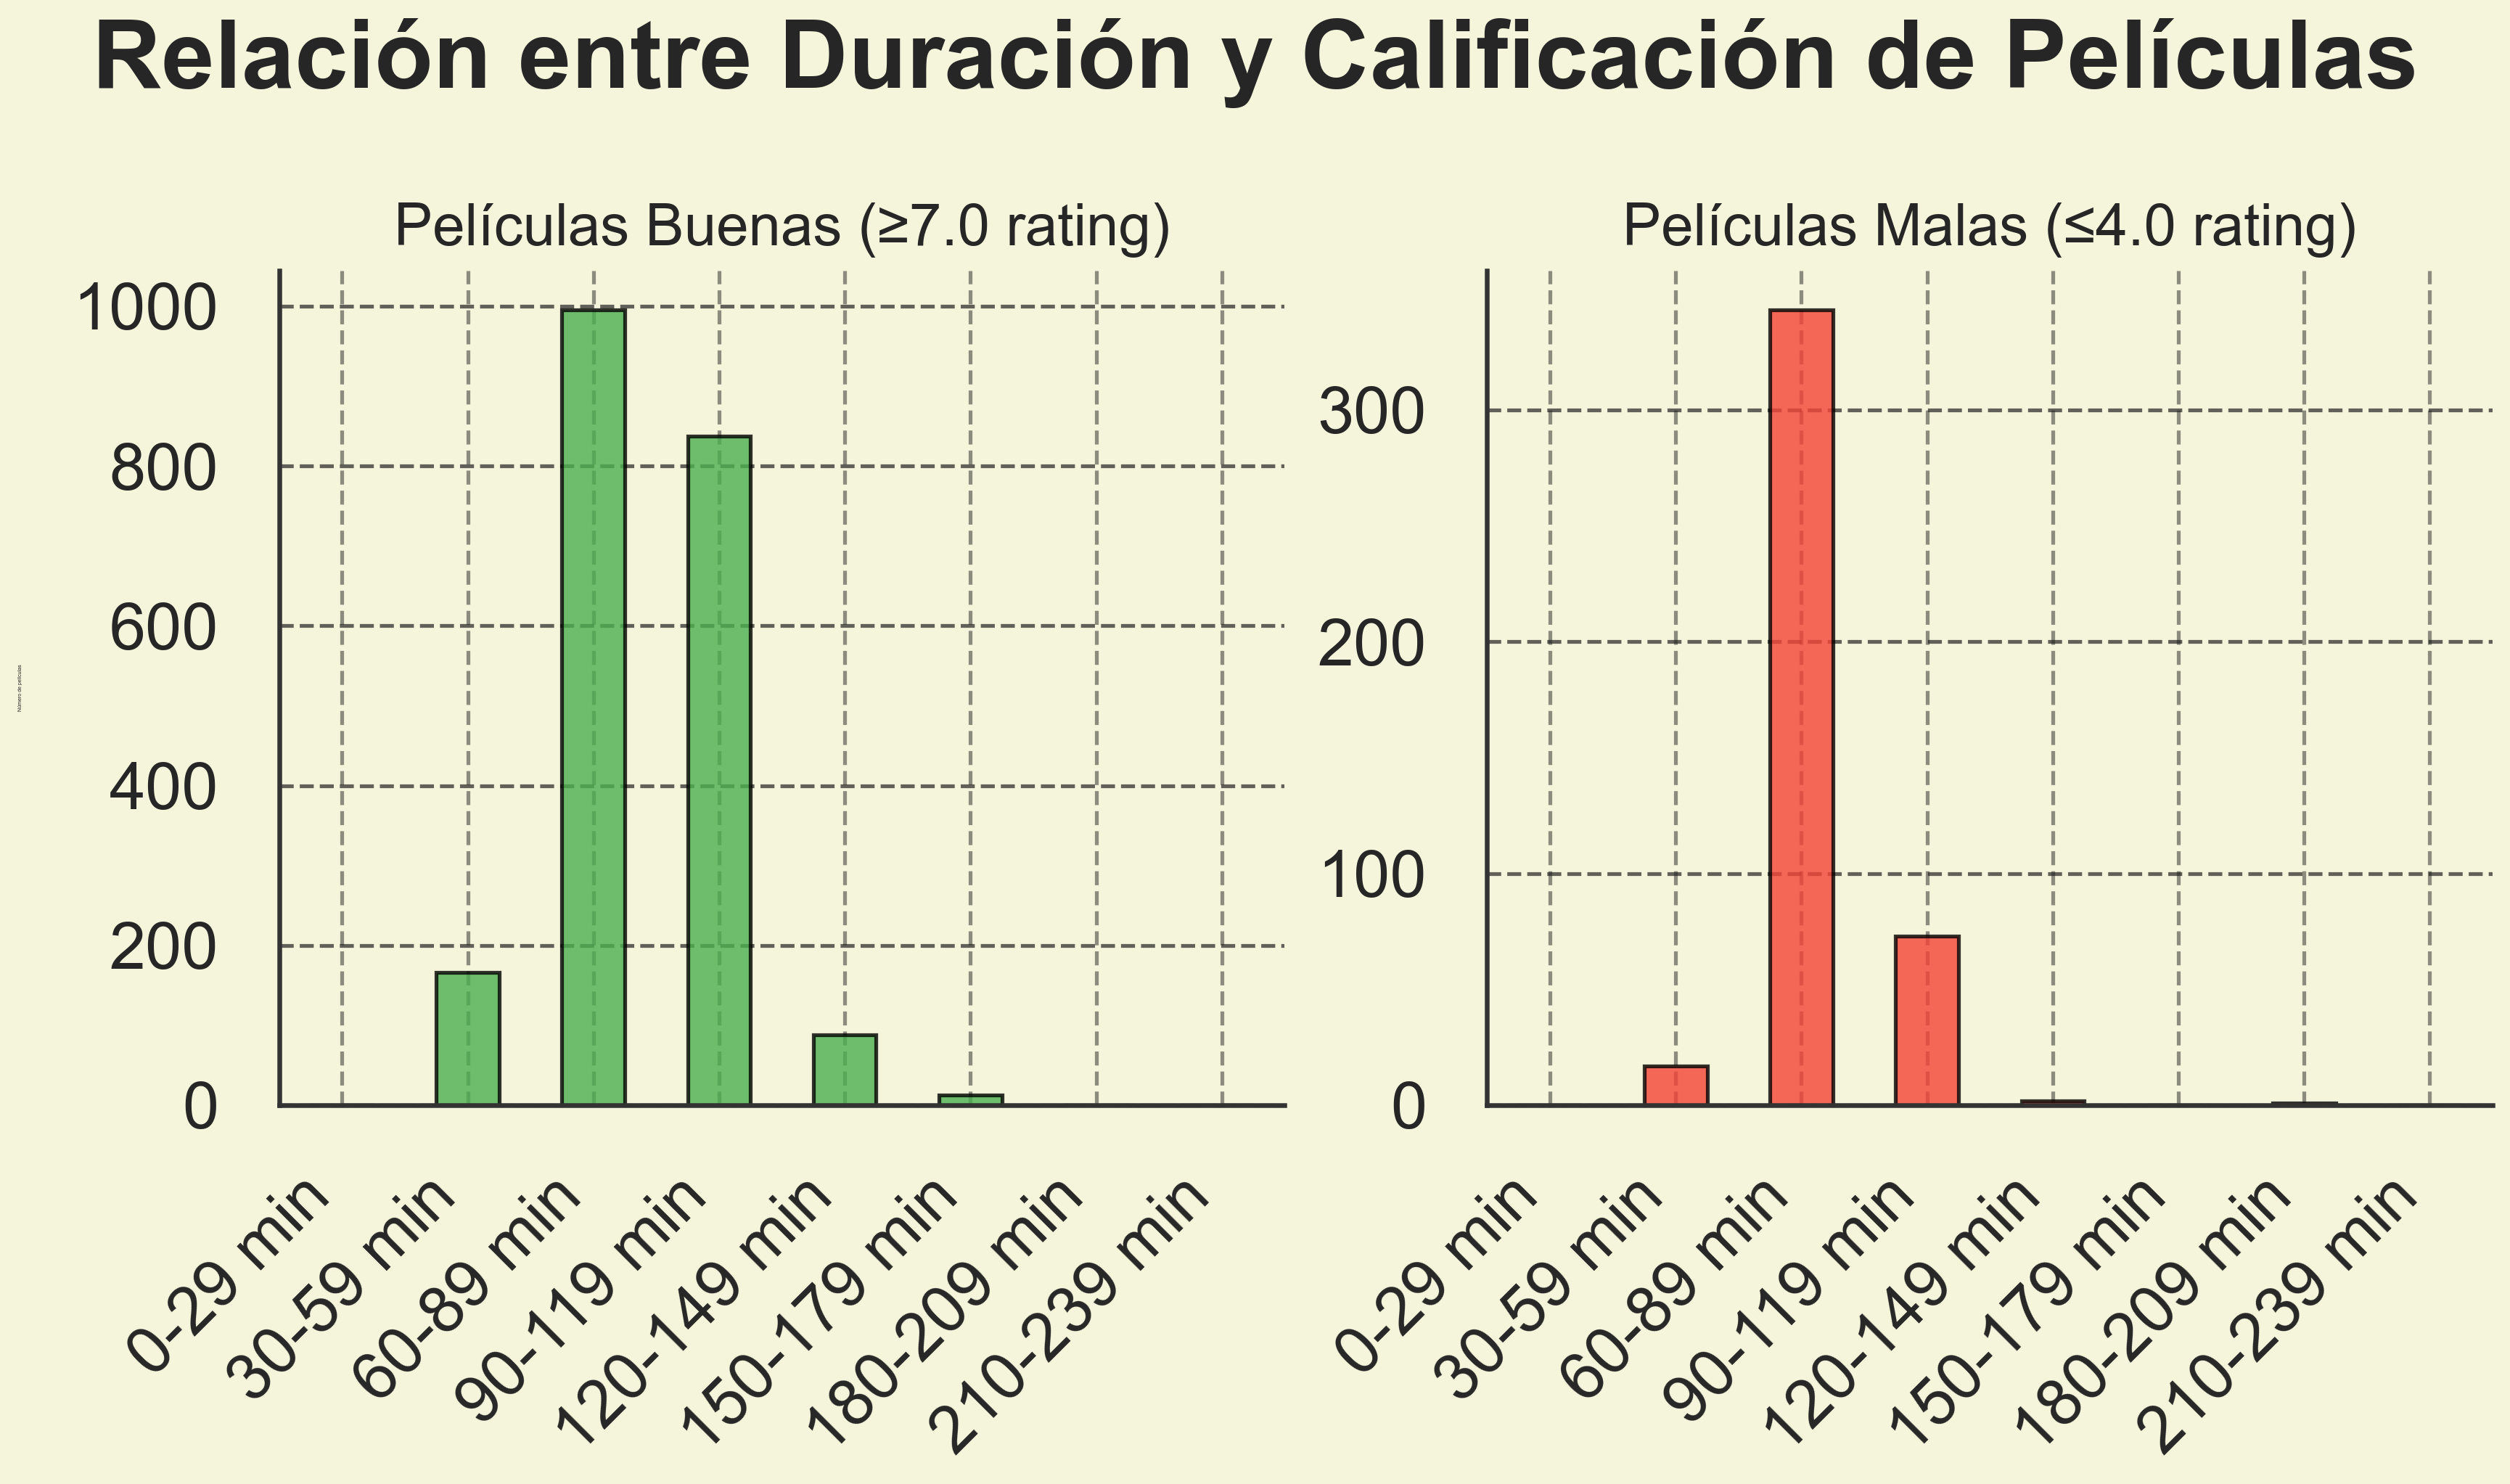

In [45]:
query = """
SELECT 
    runtimeMinutes AS duracion,
    averageRating AS calificacion,
    numVotes
FROM titles
WHERE runtimeMinutes IS NOT NULL 
  AND averageRating IS NOT NULL
  AND runtimeMinutes > 0  
  AND numVotes >= 100  
"""
df = execute_query(query)
# Definir categorías de calidad
umbral_buenas = 6.0
umbral_malas = 5.0

# Clasificar películas
df['categoria'] = pd.cut(df['calificacion'],
                        bins=[0, umbral_malas, umbral_buenas, 10],
                        labels=['Malas', 'Neutras', 'Buenas'])

# Filtrar solo buenas y malas (excluir neutras)
df = df[df['categoria'].isin(['Buenas', 'Malas'])]

# Crear bins de duración (en intervalos de 10 minutos)
df['duracion_bin'] = pd.cut(df['duracion'],
                           bins=range(0, 241, 30),  # De 0 a 240 mins en pasos de 30
                           labels=[f"{i}-{i+29} min" for i in range(0, 240, 30)])

# Preparar datos para visualización
data = df.groupby(['categoria', 'duracion_bin']).size().unstack().fillna(0)

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Gráfico para películas buenas
plt.subplot(1, 2, 1)
data.loc['Buenas'].plot(kind='bar', color='#4caf50', alpha=0.8, edgecolor='black')
plt.title('Películas Buenas (≥7.0 rating)', fontsize=23)
plt.xlabel('')
plt.ylabel('Número de películas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para películas malas
plt.subplot(1, 2, 2)
data.loc['Malas'].plot(kind='bar', color='#f44336', alpha=0.8, edgecolor='black')
plt.title('Películas Malas (≤4.0 rating)', fontsize=23)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Título general
plt.suptitle('Relación entre Duración y Calificación de Películas', y=1.02)

# Ajustar layout
plt.tight_layout()
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_8944\179415579.py:38: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



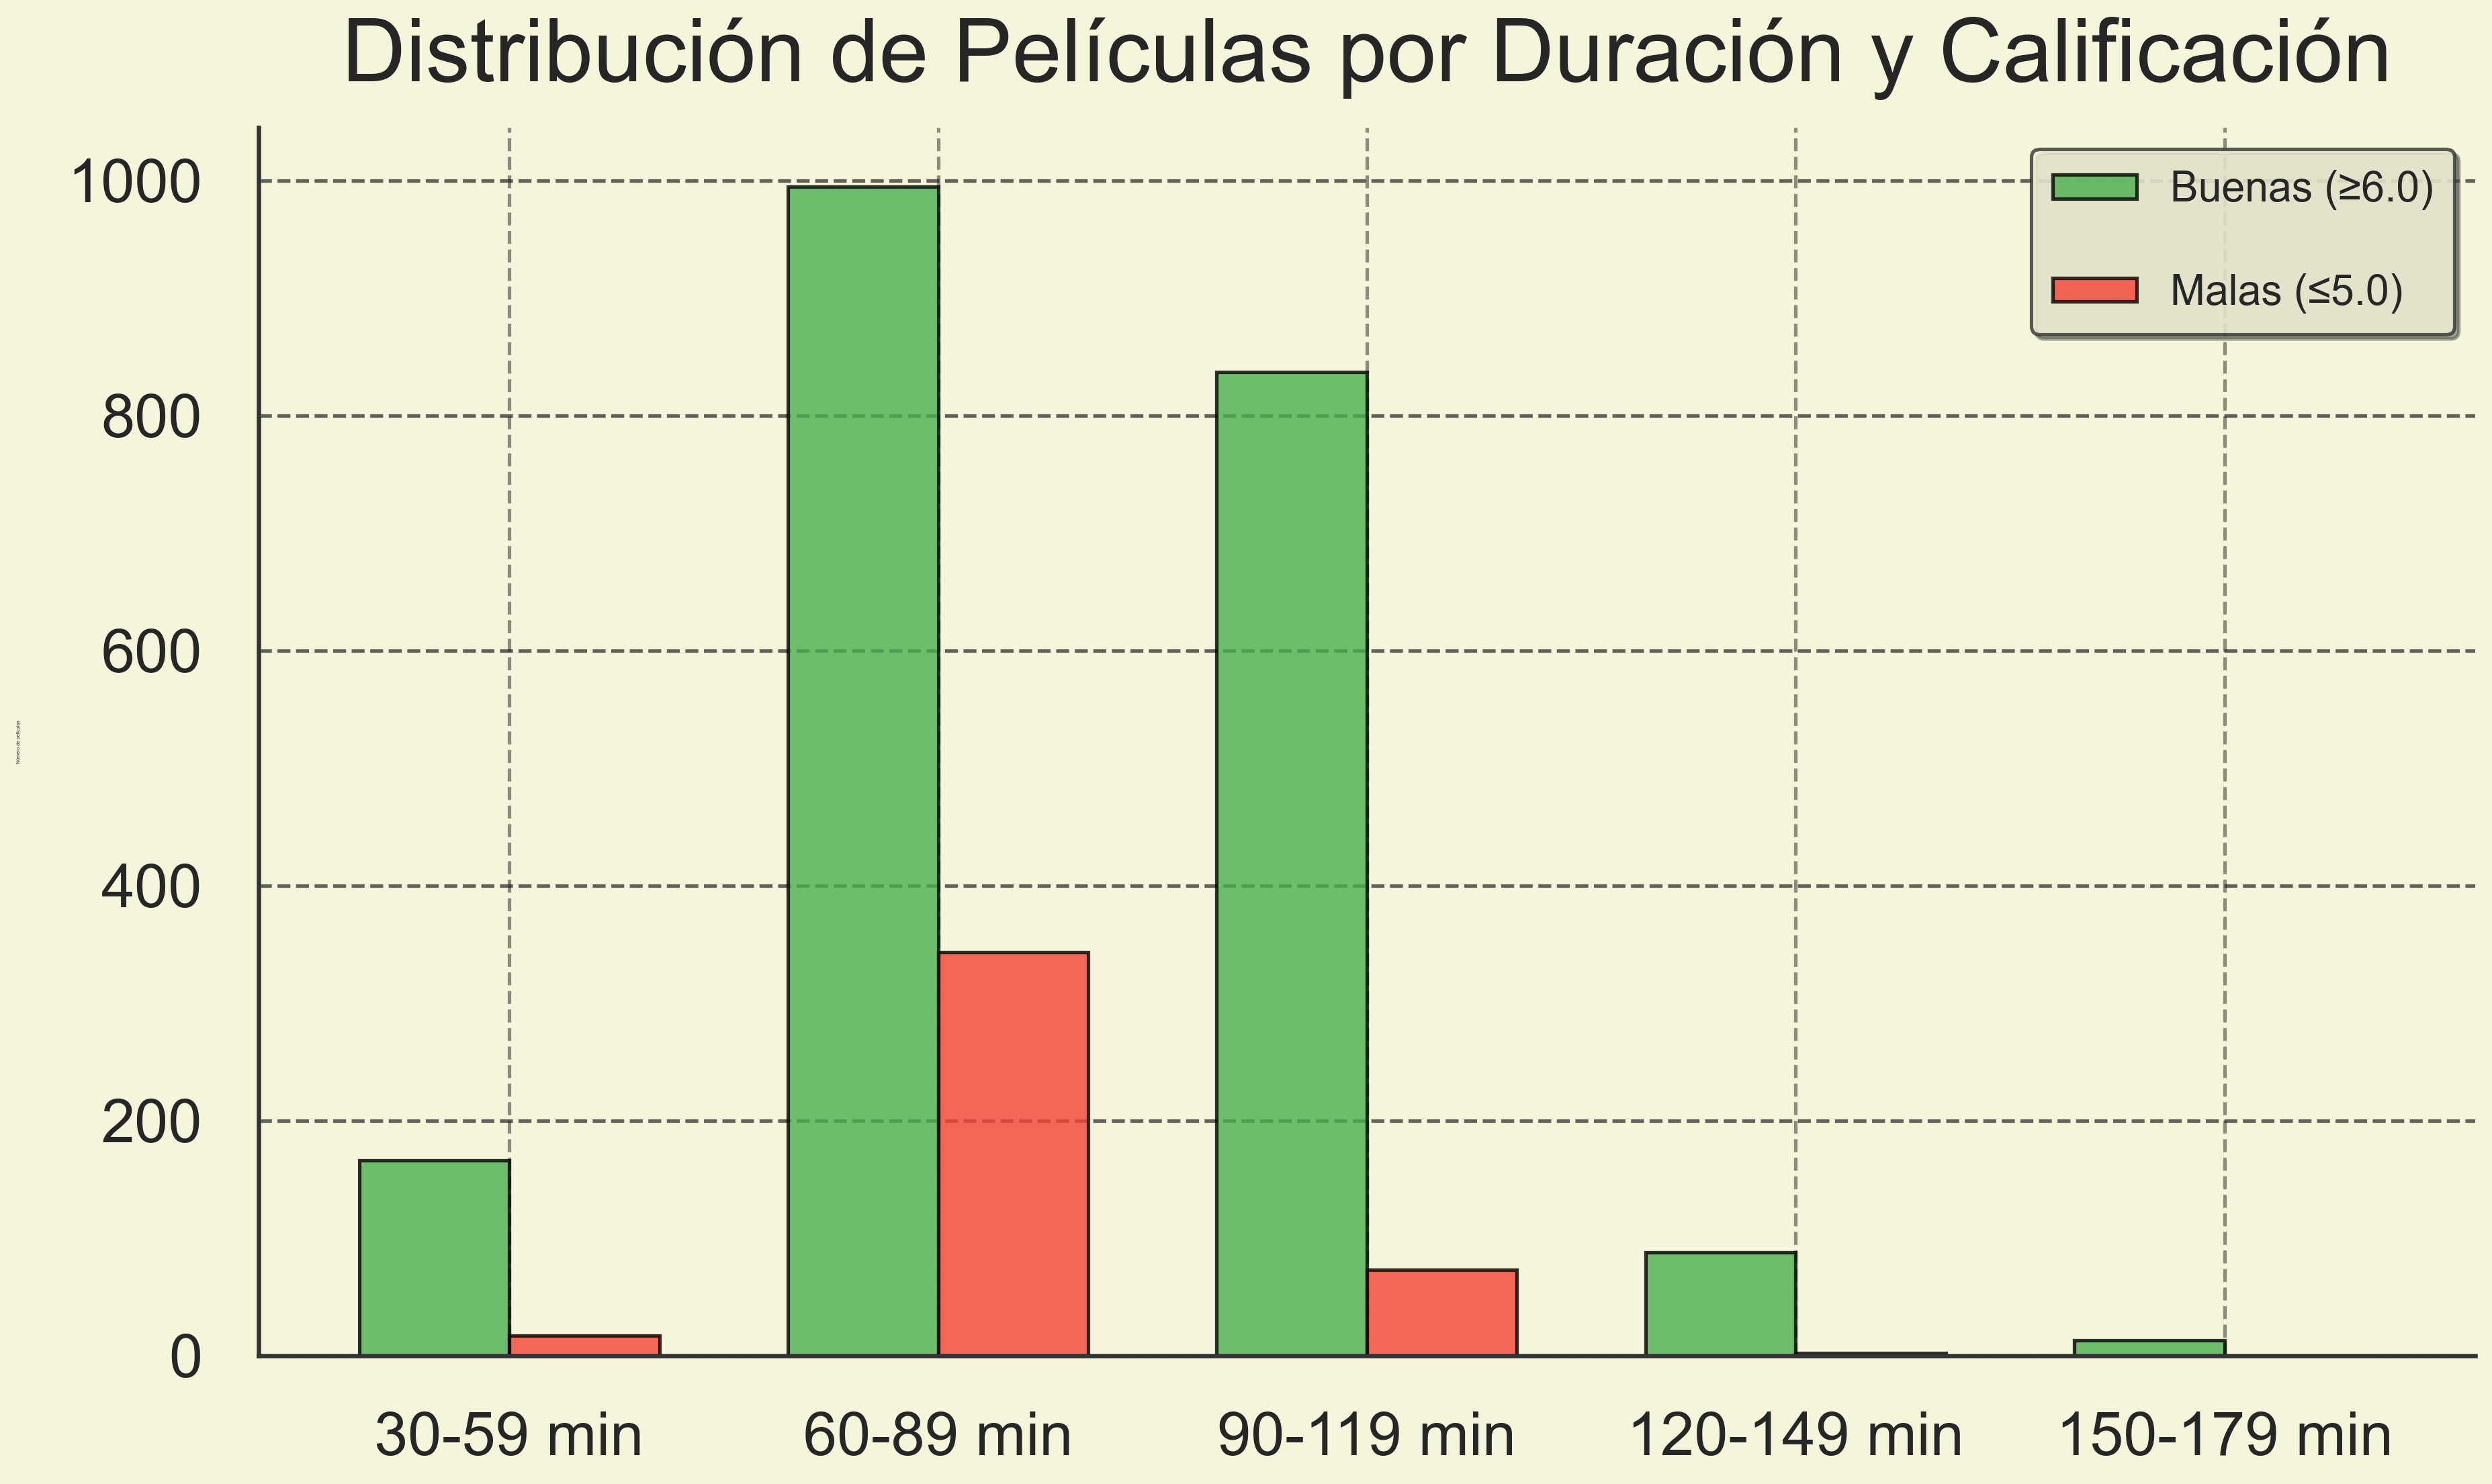

In [46]:
query = """
SELECT 
    runtimeMinutes AS duracion,
    averageRating AS calificacion,
    numVotes
FROM titles
WHERE runtimeMinutes IS NOT NULL 
  AND averageRating IS NOT NULL
  AND runtimeMinutes > 0
  AND numVotes >= 100
"""
df = execute_query(query)
# Definir categorías de calidad
umbral_buenas = 6.0
umbral_malas = 5.0

# Clasificar películas
df['categoria'] = pd.cut(df['calificacion'],
                        bins=[0, umbral_malas, umbral_buenas, 10],
                        labels=['Malas', 'Neutras', 'Buenas'])

# Filtrar solo buenas y malas (excluir neutras)
df = df[df['categoria'].isin(['Buenas', 'Malas'])]

# Definir bins específicos según lo solicitado
bins = [30, 60, 90, 120, 150, 180]
labels = ['30-59 min', '60-89 min', '90-119 min', '120-149 min', '150-179 min']

# Crear bins de duración
df['duracion_bin'] = pd.cut(df['duracion'],
                           bins=bins,
                           labels=labels)

# Eliminar filas con duración fuera de los bins especificados
df = df[df['duracion_bin'].notna()]

# Preparar datos para visualización
data = df.groupby(['categoria', 'duracion_bin']).size().unstack().fillna(0)

# Configurar el gráfico
plt.figure(figsize=(15, 9))
bar_width = 0.35
index = np.arange(len(labels))

# Crear barras para películas buenas y malas
plt.bar(index, data.loc['Buenas'], bar_width, color='#4caf50', alpha=0.8, label=f'Buenas (≥{umbral_buenas})',edgecolor='black')
plt.bar(index + bar_width, data.loc['Malas'], bar_width, color='#f44336', alpha=0.8, label=f'Malas (≤{umbral_malas})',edgecolor='black')

# Configurar ejes y leyenda
plt.xlabel('', fontsize=12)
plt.ylabel('Número de películas')
plt.title('Distribución de Películas por Duración y Calificación', pad=20)
plt.xticks(index + bar_width/2, labels, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [2]:
GHIBLI = ['tt0087544', 'tt0092067', 'tt0095327', 'tt0096283', 'tt0097814', 'tt0102587', 'tt0104652', 'tt0108432',
          'tt0110008', 'tt0113824', 'tt0119698', 'tt0206013', 'tt0245429', 'tt0347618', 'tt0347149', 'tt0495596',
          'tt0876563', 'tt1568921', 'tt1798188', 'tt2013293', 'tt2576852', 'tt3398268', 'tt12441478', 'tt6587046']

PIXAR = ['tt0114709', 'tt0120623', 'tt0120363', 'tt0198781', 'tt0266543', 'tt0317705', 'tt0317219', 'tt0382932',
         'tt0910970', 'tt1049413', 'tt0435761', 'tt1216475', 'tt1217209', 'tt1453405', 'tt2096673', 'tt1979388',
         'tt2277860', 'tt3606752', 'tt2380307', 'tt3606756', 'tt1979376', 'tt7146812', 'tt2948372', 'tt12801262',
         'tt8097030', 'tt15789038', 'tt22022452']

DREAMWORKS = ['tt0120587', 'tt0120794', 'tt0120630', 'tt0138749', 'tt0264734', 'tt0126029', 'tt0166813', 'tt0165982',
              'tt0298148', 'tt0307453', 'tt0351283', 'tt0312004', 'tt0327084', 'tt0424095', 'tt0413267', 'tt0389790',
              'tt0441773', 'tt0479952', 'tt0892769', 'tt0892782', 'tt0892791', 'tt1001526', 'tt1302011', 'tt0448694',
              'tt1277953', 'tt1446192', 'tt0481499', 'tt1860353', 'tt0864835', 'tt1646971', 'tt1911658', 'tt2224026',
              'tt2267968', 'tt1679335', 'tt3874544', 'tt2091256', 'tt2386490', 'tt6587640', 'tt2850386', 'tt6932874',
              'tt3915174', 'tt6324278', 'tt11084896', 'tt8115900', 'tt27155038', 'tt14362112', 'tt8337264', 'tt10551654',
              'tt21692408', 'tt29623480']

DISNEY = ['tt0116683', 'tt0055254', 'tt0280030', 'tt0079475', 'tt2953050', 'tt0076363', 'tt0109162', 'tt0120762',
          'tt0046183', 'tt0041890', 'tt0220099', 'tt0101414', 'tt11304740', 'tt0076929', 'tt0107688', 'tt1772341',
          'tt0120913', 'tt0095776', 'tt0358082', 'tt2294629', 'tt0306444', 'tt3513500', 'tt0076593', 'tt5848272',
          'tt0212112', 'tt6009292', 'tt1305591', 'tt2980706', 'tt0130623', 'tt0213268', 'tt0116583', 'tt4520988',
          'tt0133240', 'tt0099472', 'tt0405469', 'tt0230011', 'tt0041094', 'tt0382932', 'tt15847828', 'tt0372871',
          'tt0397892', 'tt0039404', 'tt10298840', 'tt0032910', 'tt1067106', 'tt13623880', 'tt0040580', 'tt0114148',
          'tt0328880', 'tt13834480', 'tt0265632', 'tt1691917', 'tt32452718', 'tt0407121', 'tt3521164', 'tt0120917',
          'tt0082406', 'tt0038969', 'tt0057546', 'tt0100477', 'tt0053285', 'tt0275847', 'tt0323642', 'tt0038718',
          'tt0187819', 'tt0212114', 'tt0034091', 'tt0061852', 'tt0398286', 'tt0034492', 'tt0361089', 'tt0091149',
          'tt0396555', 'tt29033964', 'tt0103639', 'tt0070608', 'tt0029583', 'tt0119282', 'tt0076538', 'tt0113198',
          'tt2948356', 'tt0299172', 'tt1217213', 'tt0212116', 'tt0120855', 'tt1185834', 'tt0048280', 'tt0065421',
          'tt0120910', 'tt0229664', 'tt0033563', 'tt0088814', 'tt0118617', 'tt1449283', 'tt0032455', 'tt1142977',
          'tt0371606', 'tt0038166', 'tt0780521', 'tt0097757', 'tt0043274', 'tt0210654', 'tt0250950', 'tt0283426',
          'tt0042332', 'tt0317219', 'tt0036497', 'tt32452564', 'tt0092695', 'tt0239634', 'tt2245084', 'tt5109280',
          'tt0076618', 'tt13622970', 'tt0110357']

In [3]:
PALETA = ["#FEBA17","#14B1D5","#328E6E", "#D91656", "#EB5B00", "#273F4F",]
def set_style(mode='presentacion'):
    """
    Configura estilos de seaborn/matplotlib según el modo:
      - 'presentacion': tipografía grande, fondo beige y rejilla destacada.
      - 'reporte': tipografía más pequeña, fondo blanco y rejilla suave.
    """
    if mode == 'presentacion':
        context = "talk"
        rc = {
            "font.family": "sans-serif",
            "font.sans-serif": ["DejaVu Sans"],
            "font.size": 12,
            # titulo
            "figure.titlesize": 30,
            "figure.titleweight": "bold",
            # ejes
            "axes.titlesize": 24,
            "xtick.labelsize": 22,
            "ytick.labelsize": 22,
            "axes.titlepad": 10,
            "axes.facecolor": "#F5F5DC",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "axes.edgecolor": "#333333",
            "axes.grid": True,
            # ejes rejilla
            "grid.color": "#222",
            "grid.linestyle": "--",
            "grid.linewidth": 1.5,
            "grid.alpha": 0.5,
            # ejes etiquetas
            "axes.labelsize": 26,
            # pad entre eje y etiquetas de valores
            "xtick.major.pad": 15,
            "ytick.major.pad": 15,
            # pad entre el nombre del eje y los ticks
            "axes.labelpad": 20,
            # leyenda
            "legend.fontsize": 18,
            "legend.title_fontsize": 20,
            "legend.labelspacing": 1.5,
            "legend.handlelength": 2,
            "legend.handleheight": 0.5,
            "legend.borderpad": 0.5,
            "legend.borderaxespad": 0.5,
            "legend.markerscale": 1.5,
            "legend.framealpha": 0.8,
            "legend.loc": "best",
            "legend.facecolor": "#F5F5DC",
            "legend.shadow": True,
            "legend.edgecolor": "#333333",
            "legend.frameon": True,
            # fondo
            "figure.facecolor": "#F5F5DC",
            # figura resolucion y tamaño
            "figure.dpi": 250,
            "figure.figsize": (12, 8)
            }
    elif mode == 'reporte':
        context = "notebook"
        rc = {
            "font.family": "sans-serif",
            "font.sans-serif": ["DejaVu Sans"],
            "font.size": 12,
            # titulo
            "figure.titlesize": 25,
            "figure.titleweight": "bold",
            # ejes
            "axes.titlesize": 22,
            "xtick.labelsize": 18,
            "ytick.labelsize": 18,
            "axes.titlepad": 14,
            "axes.facecolor": "#F5F5DC",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "axes.edgecolor": "#333333",
            "axes.grid": True,
            # ejes rejilla
            "grid.color": "#222",
            "grid.linestyle": "--",
            "grid.linewidth": 1.5,
            "grid.alpha": 0.5,
            # ejes etiquetas
            "axes.labelsize": 22,
            # pad entre eje y etiquetas de valores
            "xtick.major.pad": 15,
            "ytick.major.pad": 15,
            # pad entre el nombre del eje y los ticks
            "axes.labelpad": 15,
            # leyenda
            "legend.fontsize": 14,
            "legend.title_fontsize": 16,
            "legend.labelspacing": 1.5,
            "legend.handlelength": 2,
            "legend.handleheight": 0.5,
            "legend.borderpad": 0.5,
            "legend.borderaxespad": 0.5,
            "legend.markerscale": 1.5,
            "legend.framealpha": 0.8,
            "legend.loc": "best",
            "legend.facecolor": "#F5F5DC",
            "legend.shadow": True,
            "legend.edgecolor": "#333333",
            "legend.frameon": True,
            # fondo
            "figure.facecolor": "#F5F5DC",
            # figura resolucion y tamaño
            "figure.dpi": 180,
            "figure.figsize": (12, 8)
            }
    else:
        raise ValueError("Modo desconocido. Use 'presentacion' o 'reporte'.")
    sns.set_theme(context=context, palette=PALETA, rc=rc)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETA)

# Ejemplo de uso:
set_style('presentacion')
# set_style('reporte')

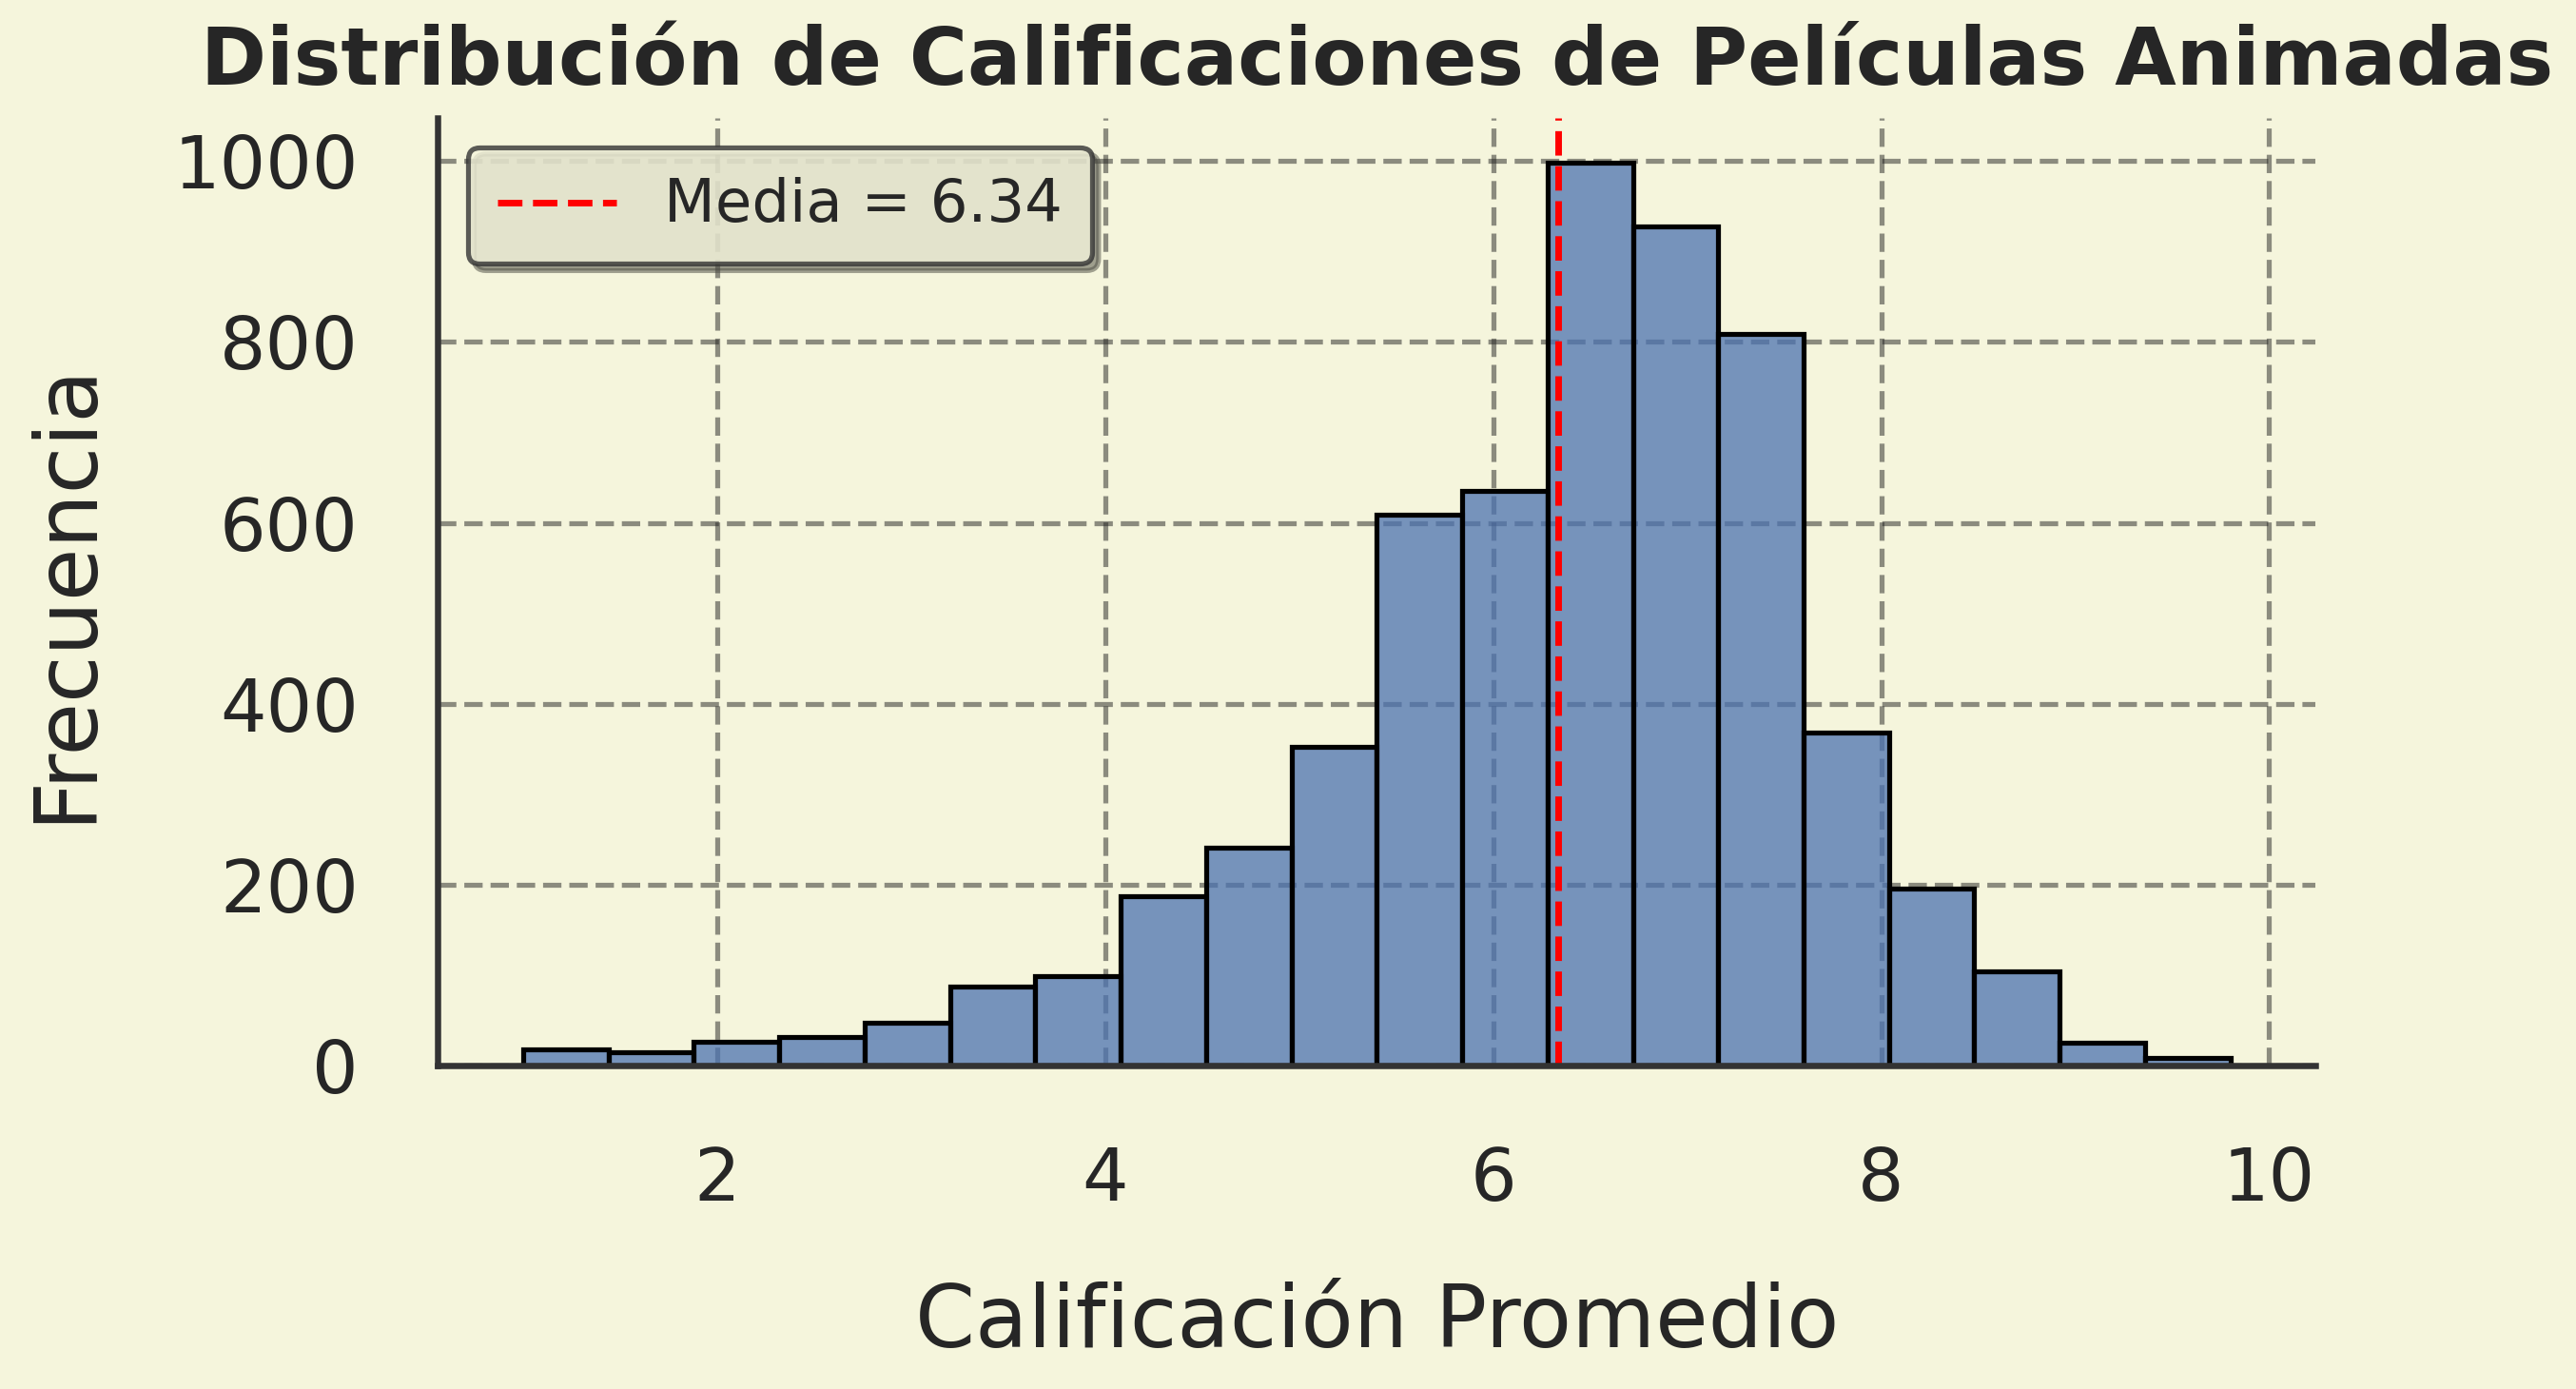

In [4]:
# Conexión a la base de datos
conn = sqlite3.connect("im.db")

# Leer las calificaciones promedio
query = "SELECT averageRating FROM titles WHERE averageRating IS NOT NULL"
ratings_df = pd.read_sql_query(query, conn)
conn.close()

mean_rating = ratings_df['averageRating'].mean()

# Gráfica
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['averageRating'], bins=20, kde=False, color="#4C72B0", edgecolor="black")

# Línea de media
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f"Media = {mean_rating:.2f}")

# Títulos y etiquetas
plt.title("Distribución de Calificaciones de Películas Animadas", fontweight='bold')
plt.xlabel("Calificación Promedio")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


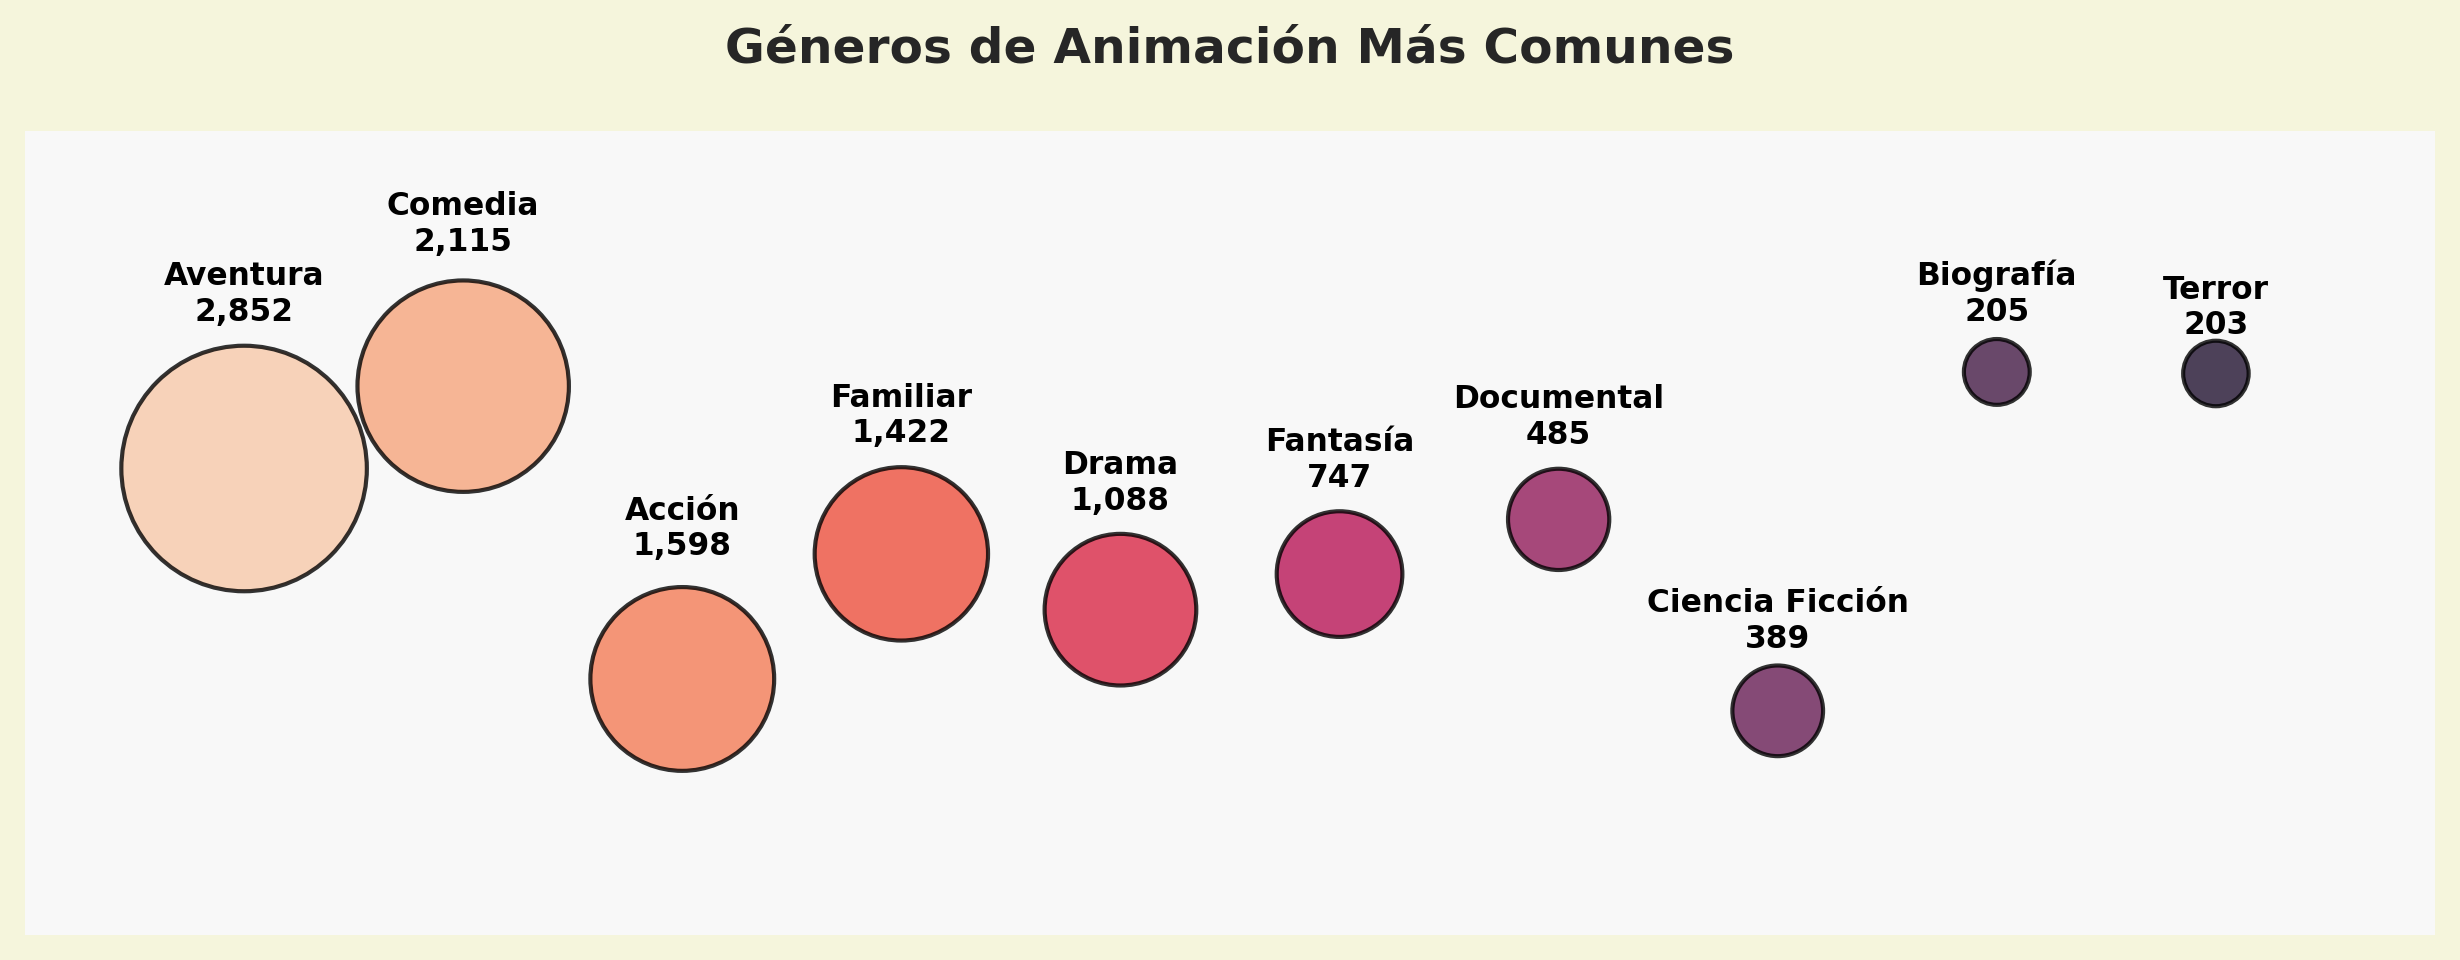

In [5]:
# Conectar a la base de datos
conn = sqlite3.connect("im.db")

# Consulta para contar títulos por género
query = """
SELECT g.genre_name, COUNT(*) AS total
FROM title_genres tg
JOIN genres g ON g.id = tg.genre_id
GROUP BY g.genre_name
ORDER BY total DESC
LIMIT 10;
"""
genre_df = pd.read_sql_query(query, conn)
conn.close()

# Diccionario de traducción de géneros
genre_translation = {
    "Adventure": "Aventura",
    "Comedy": "Comedia",
    "Action": "Acción",
    "Family": "Familiar",
    "Drama": "Drama",
    "Fantasy": "Fantasía",
    "Documentary": "Documental",
    "Sci-Fi": "Ciencia Ficción",
    "Biography": "Biografía",
    "Horror": "Terror"
}

# Aplicar la traducción a la columna
genre_df["genre_name"] = genre_df["genre_name"].map(genre_translation)

# Paleta de colores cálida y progresiva
colors = sns.color_palette("rocket_r", len(genre_df))

# Crear figura
plt.figure(figsize=(10, 4))

# Eje X: cada burbuja para un género (categorías)
x = np.arange(len(genre_df))
y = np.random.uniform(0.5, 1.5, size=len(genre_df))  # altura aleatoria para estética

# Escalar los tamaños proporcionalmente al total
sizes = genre_df["total"] / genre_df["total"].max() * 5000

# Dibujar las burbujas
scatter = plt.scatter(
    x, y,
    s=sizes,
    c=colors,
    alpha=0.8,
    edgecolors="black",
    linewidth=1.2
)

# Etiquetas encima de cada burbuja
delta = 0.35  # Desplazamiento para evitar superposición
for i, (genre, total) in enumerate(zip(genre_df["genre_name"], genre_df["total"])):
    plt.text(
        x[i], y[i] + delta,
        f"{genre}\n{total:,}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )
    delta -= 0.03  # Aumentar el desplazamiento para la siguiente etiqueta

# Estética general
plt.xticks([])  # Ocultar ticks del eje X
plt.yticks([])  # Ocultar eje Y
plt.xlim(-1, len(genre_df))
plt.ylim(0, 2)

plt.title("Géneros de Animación Más Comunes", fontsize=14, pad=20, fontweight='bold')
plt.gca().set_facecolor("#F8F8F8")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

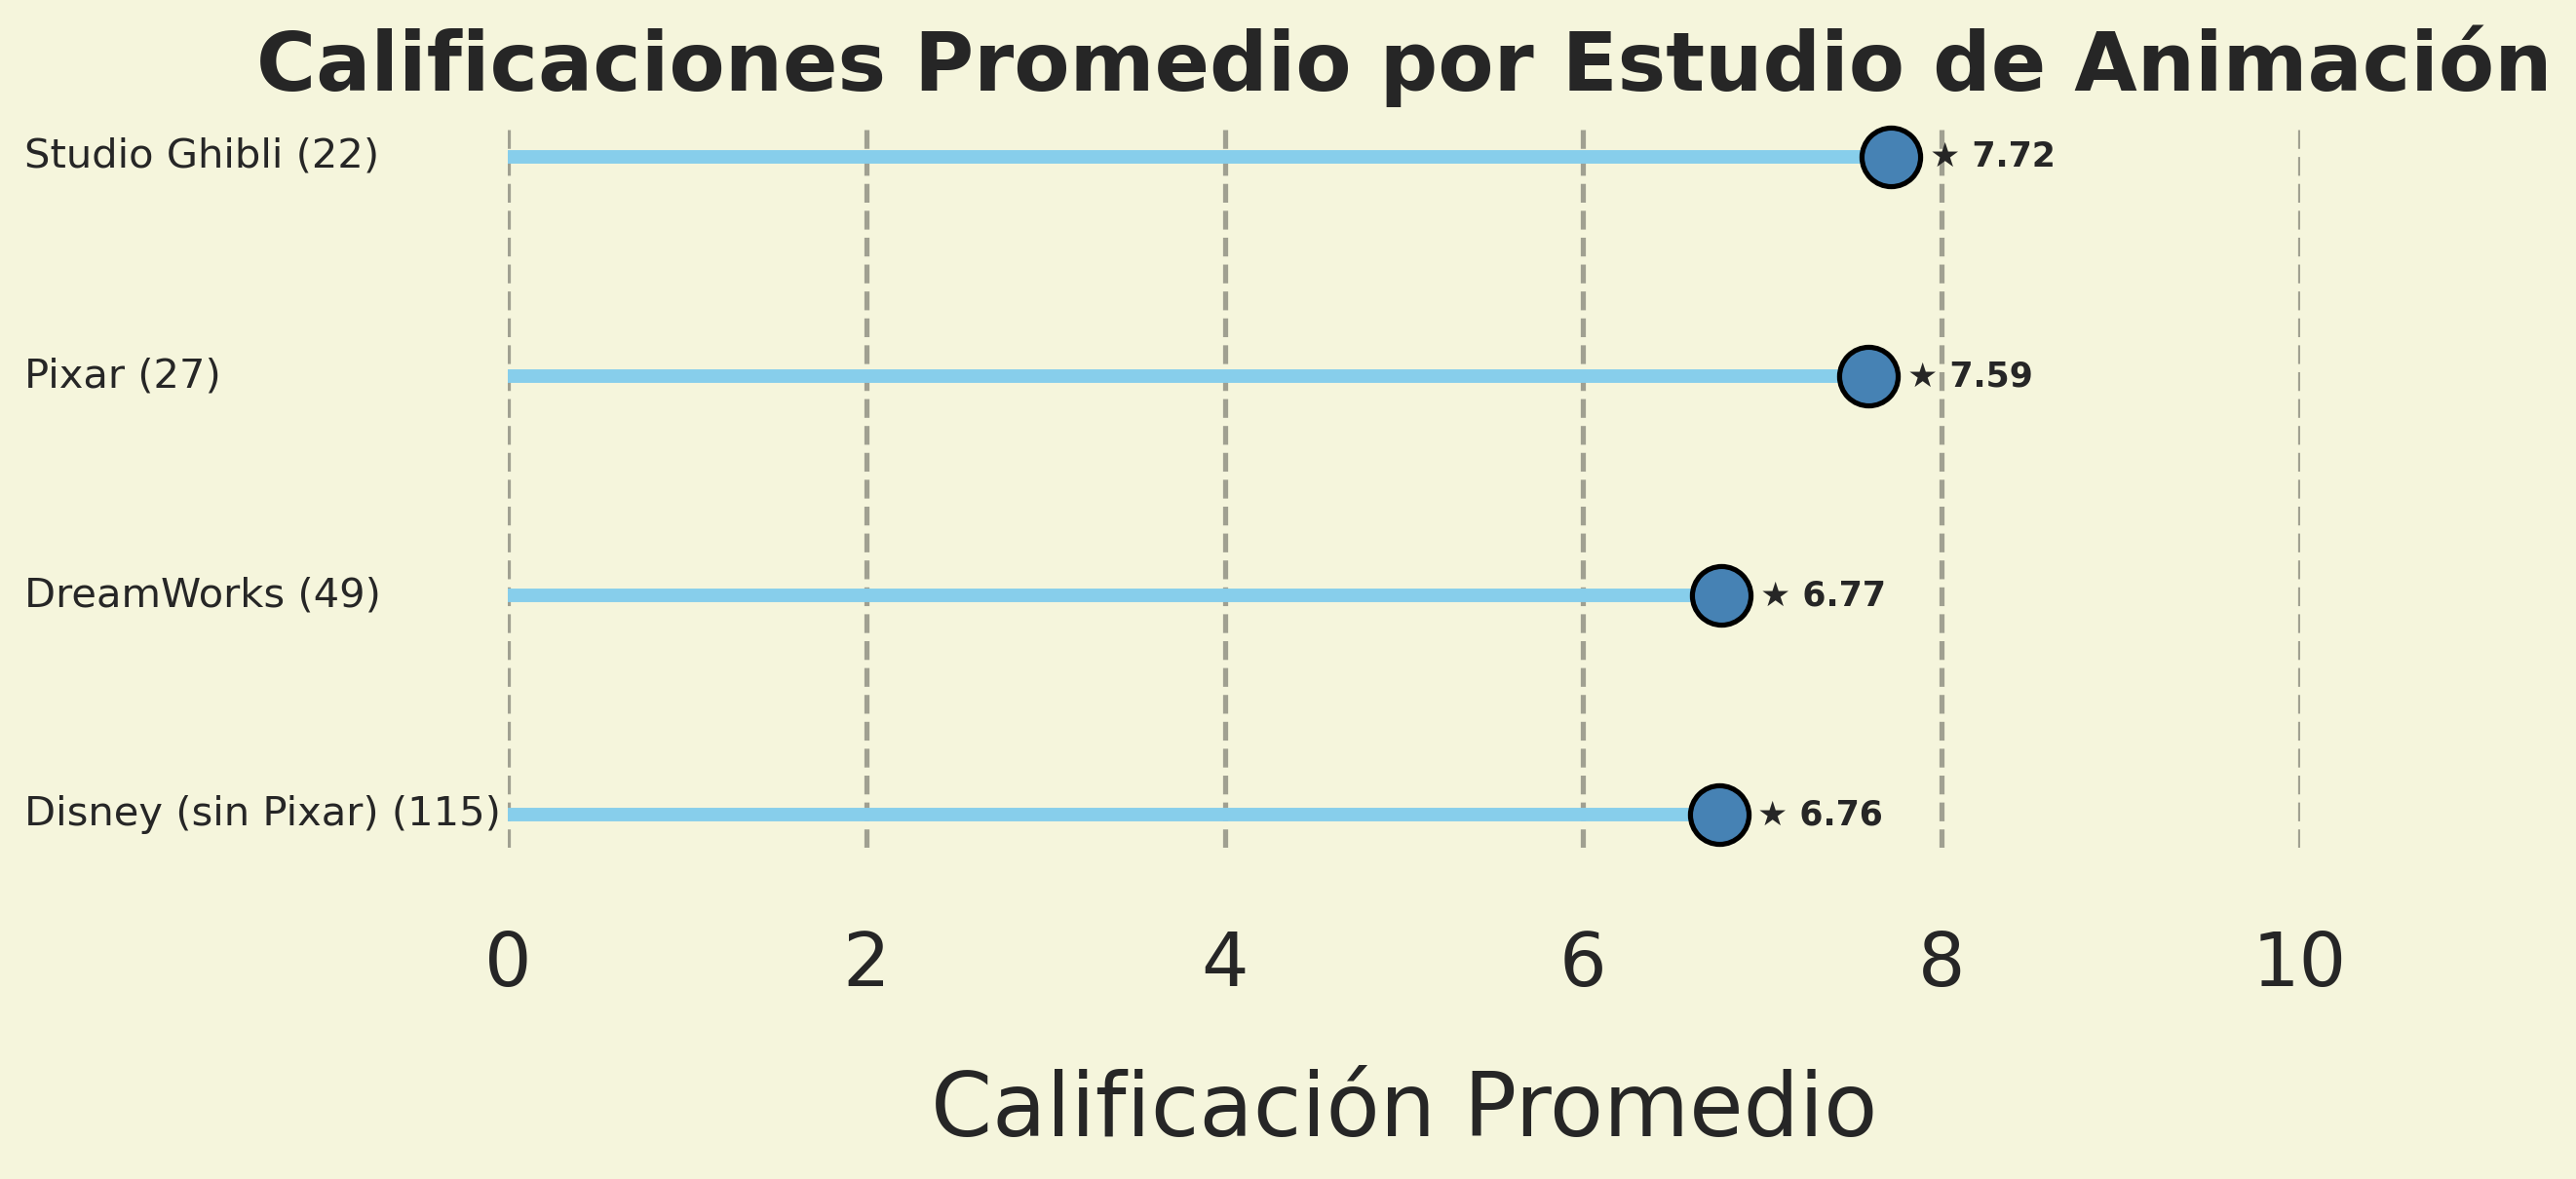

In [6]:
# Conectar a la base de datos
conn = sqlite3.connect("im.db")

# Diccionario con las listas de tconsts por compañía
companies = {
    "Studio Ghibli": GHIBLI,
    "Disney": DISNEY,
    "Pixar": PIXAR,
    "DreamWorks": DREAMWORKS
}

# Lista para almacenar los resultados
company_ratings = []

# Consultar promedio y cantidad por compañía
for name, id_list in companies.items():
    placeholders = ",".join("?" for _ in id_list)
    query = f"""
        SELECT AVG(averageRating), COUNT(*) 
        FROM titles
        WHERE tconst IN ({placeholders})
    """
    avg, count = conn.execute(query, id_list).fetchone()
    company_ratings.append((name, avg, count))

conn.close()

# Crear DataFrame
ratings_df = pd.DataFrame(company_ratings, columns=["Compañía", "Promedio", "Películas"])

# Renombrar etiquetas de compañías para visualización
label_mapping = {
    "Disney": "Disney (sin Pixar)"
}
ratings_df["Compañía"] = ratings_df["Compañía"].replace(label_mapping)

# Ordenar por promedio
ratings_df = ratings_df.sort_values(by="Promedio", ascending=True).reset_index(drop=True)

# Gráfica
plt.figure(figsize=(10, 5))
y = np.arange(len(ratings_df))

# Líneas y puntos
plt.hlines(y, 0, ratings_df["Promedio"], color="skyblue", linewidth=4)
plt.scatter(ratings_df["Promedio"], y, s=300, color="steelblue", edgecolors="black", zorder=3)

# Mostrar nombre, promedio y cantidad
for i, (prom, comp, num) in enumerate(zip(ratings_df["Promedio"], ratings_df["Compañía"], ratings_df["Películas"])):
    plt.text(prom + 0.15, i, f" ★ {prom:.2f}", va="center", fontsize=10, fontweight='bold')
    plt.text(-2.7, i, f"{comp} ({num})", va="center", fontsize=12, fontweight='medium')  # ← Aquí agregamos el conteo

# Estética
plt.yticks([])
plt.xlabel("Calificación Promedio")
plt.title("Calificaciones Promedio por Estudio de Animación", fontweight='bold')
plt.xlim(0, 10)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

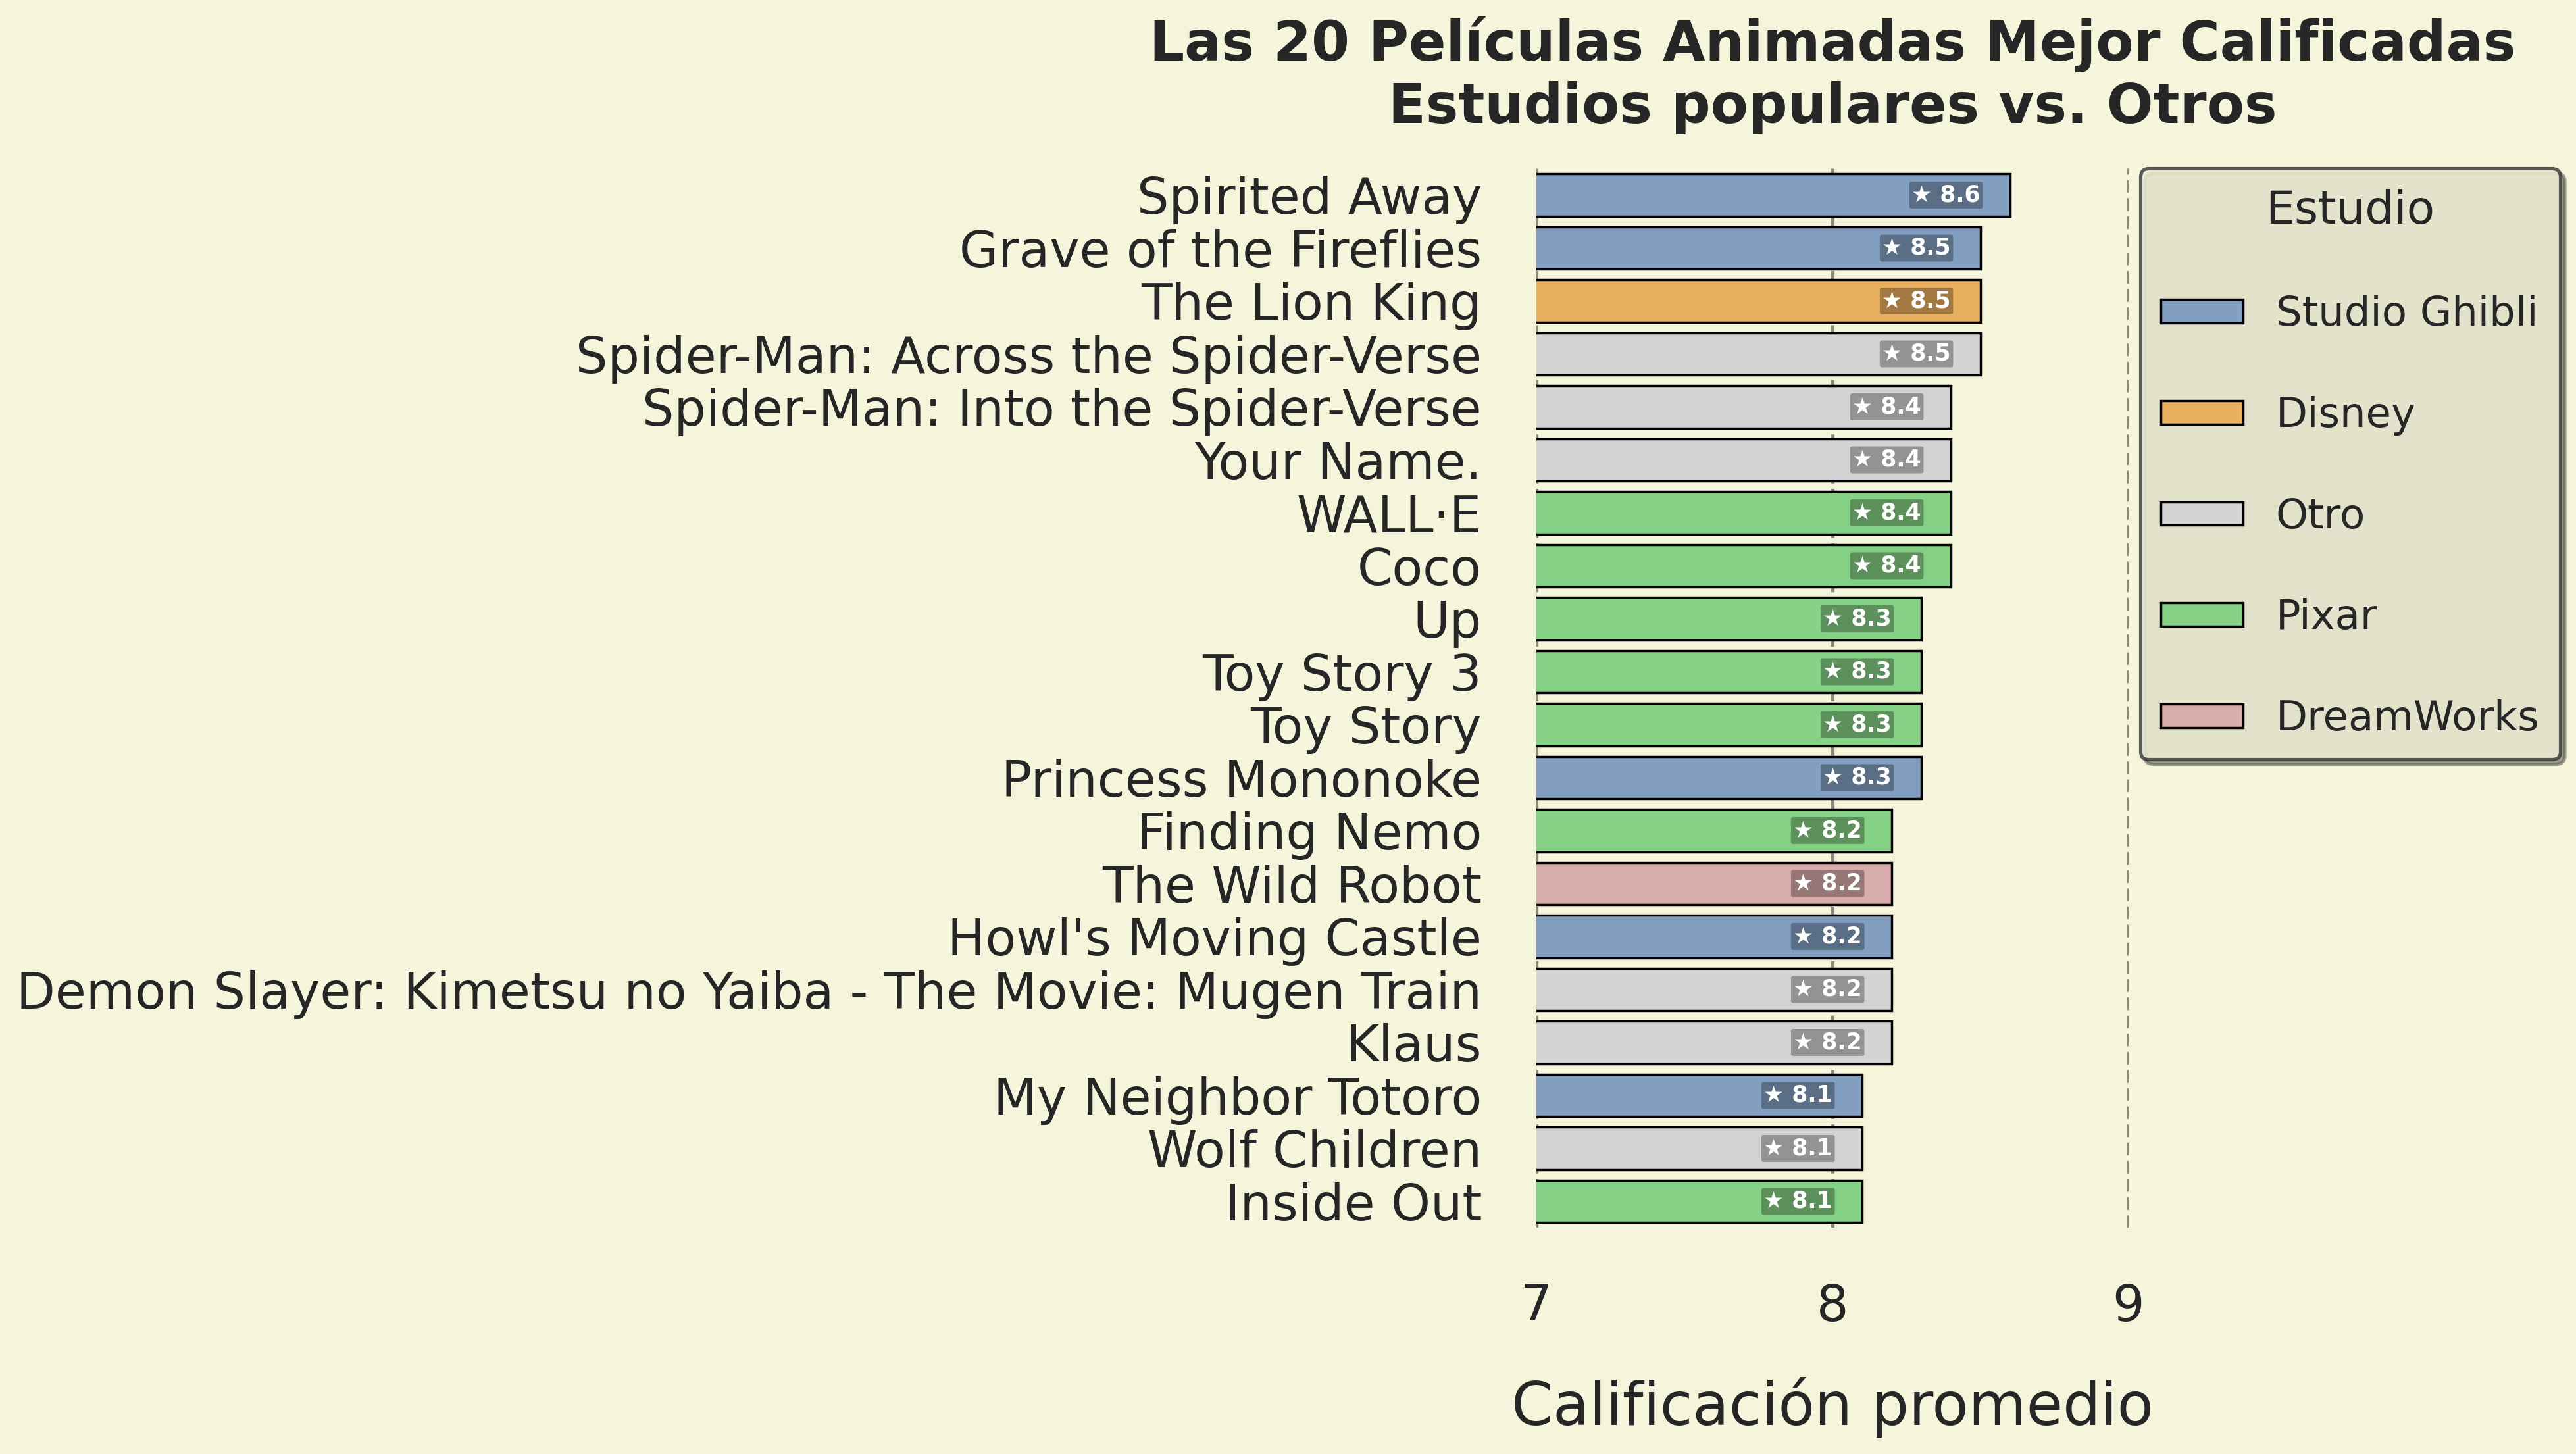

In [7]:
# Crear un DataFrame con los tconst y estudio
def create_company_df(ids, name):
    return pd.DataFrame({"tconst": ids, "studio": name})

all_companies = pd.concat([
    create_company_df(DISNEY, "Disney"),
    create_company_df(PIXAR, "Pixar"),
    create_company_df(DREAMWORKS, "DreamWorks"),
    create_company_df(GHIBLI, "Studio Ghibli")
])

# Conectar a la base de datos
conn = sqlite3.connect("im.db")

# Cargar todos los títulos animados con su rating
query = """
SELECT tconst, primaryTitle, averageRating
FROM titles
WHERE averageRating IS NOT NULL AND numVotes > 50000
"""
title_info = pd.read_sql_query(query, conn)
conn.close()

# Función para asignar estudio
def asignar_estudio(tconst):
    if tconst in DISNEY:
        return "Disney"
    elif tconst in PIXAR:
        return "Pixar"
    elif tconst in DREAMWORKS:
        return "DreamWorks"
    elif tconst in GHIBLI:
        return "Studio Ghibli"
    else:
        return "Otro"

# Asignar estudio
title_info["studio"] = title_info["tconst"].apply(asignar_estudio)

# Top 20 por calificación
top20 = title_info.sort_values("averageRating", ascending=False).head(20)

# Crear la figura
plt.figure(figsize=(16, 9))

# Colores personalizados
palette = {
    "Disney": "#FFB347",
    "Pixar": "#77DD77",
    "DreamWorks": "#DEA5A4",
    "Studio Ghibli": "#779ECB",
    "Otro": "#D3D3D3"
}

# Gráfico de barras horizontales
ax = sns.barplot(
    data=top20,
    x="averageRating",
    y="primaryTitle",
    hue="studio",
    dodge=False,
    palette=palette,
    edgecolor="black",
    linewidth=1
)

# Título y ejes
plt.title("Las 20 Películas Animadas Mejor Calificadas\nEstudios populares vs. Otros", pad=20, fontweight='bold')
plt.xlabel("Calificación promedio")
plt.ylabel("")
plt.xlim(7, 9)

# Leyenda fuera
plt.legend(title="Estudio", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

# Etiquetas en barras
for i, (_, row) in enumerate(top20.iterrows()):
    ax.text(
        row["averageRating"] - 0.1,
        i,
        f'★ {row["averageRating"]:.1f}',
        va='center',
        ha='right',
        color='white',
        fontweight='bold',
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.1", edgecolor="none", facecolor="black", alpha=0.3)
    )

# Limpiar ejes
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


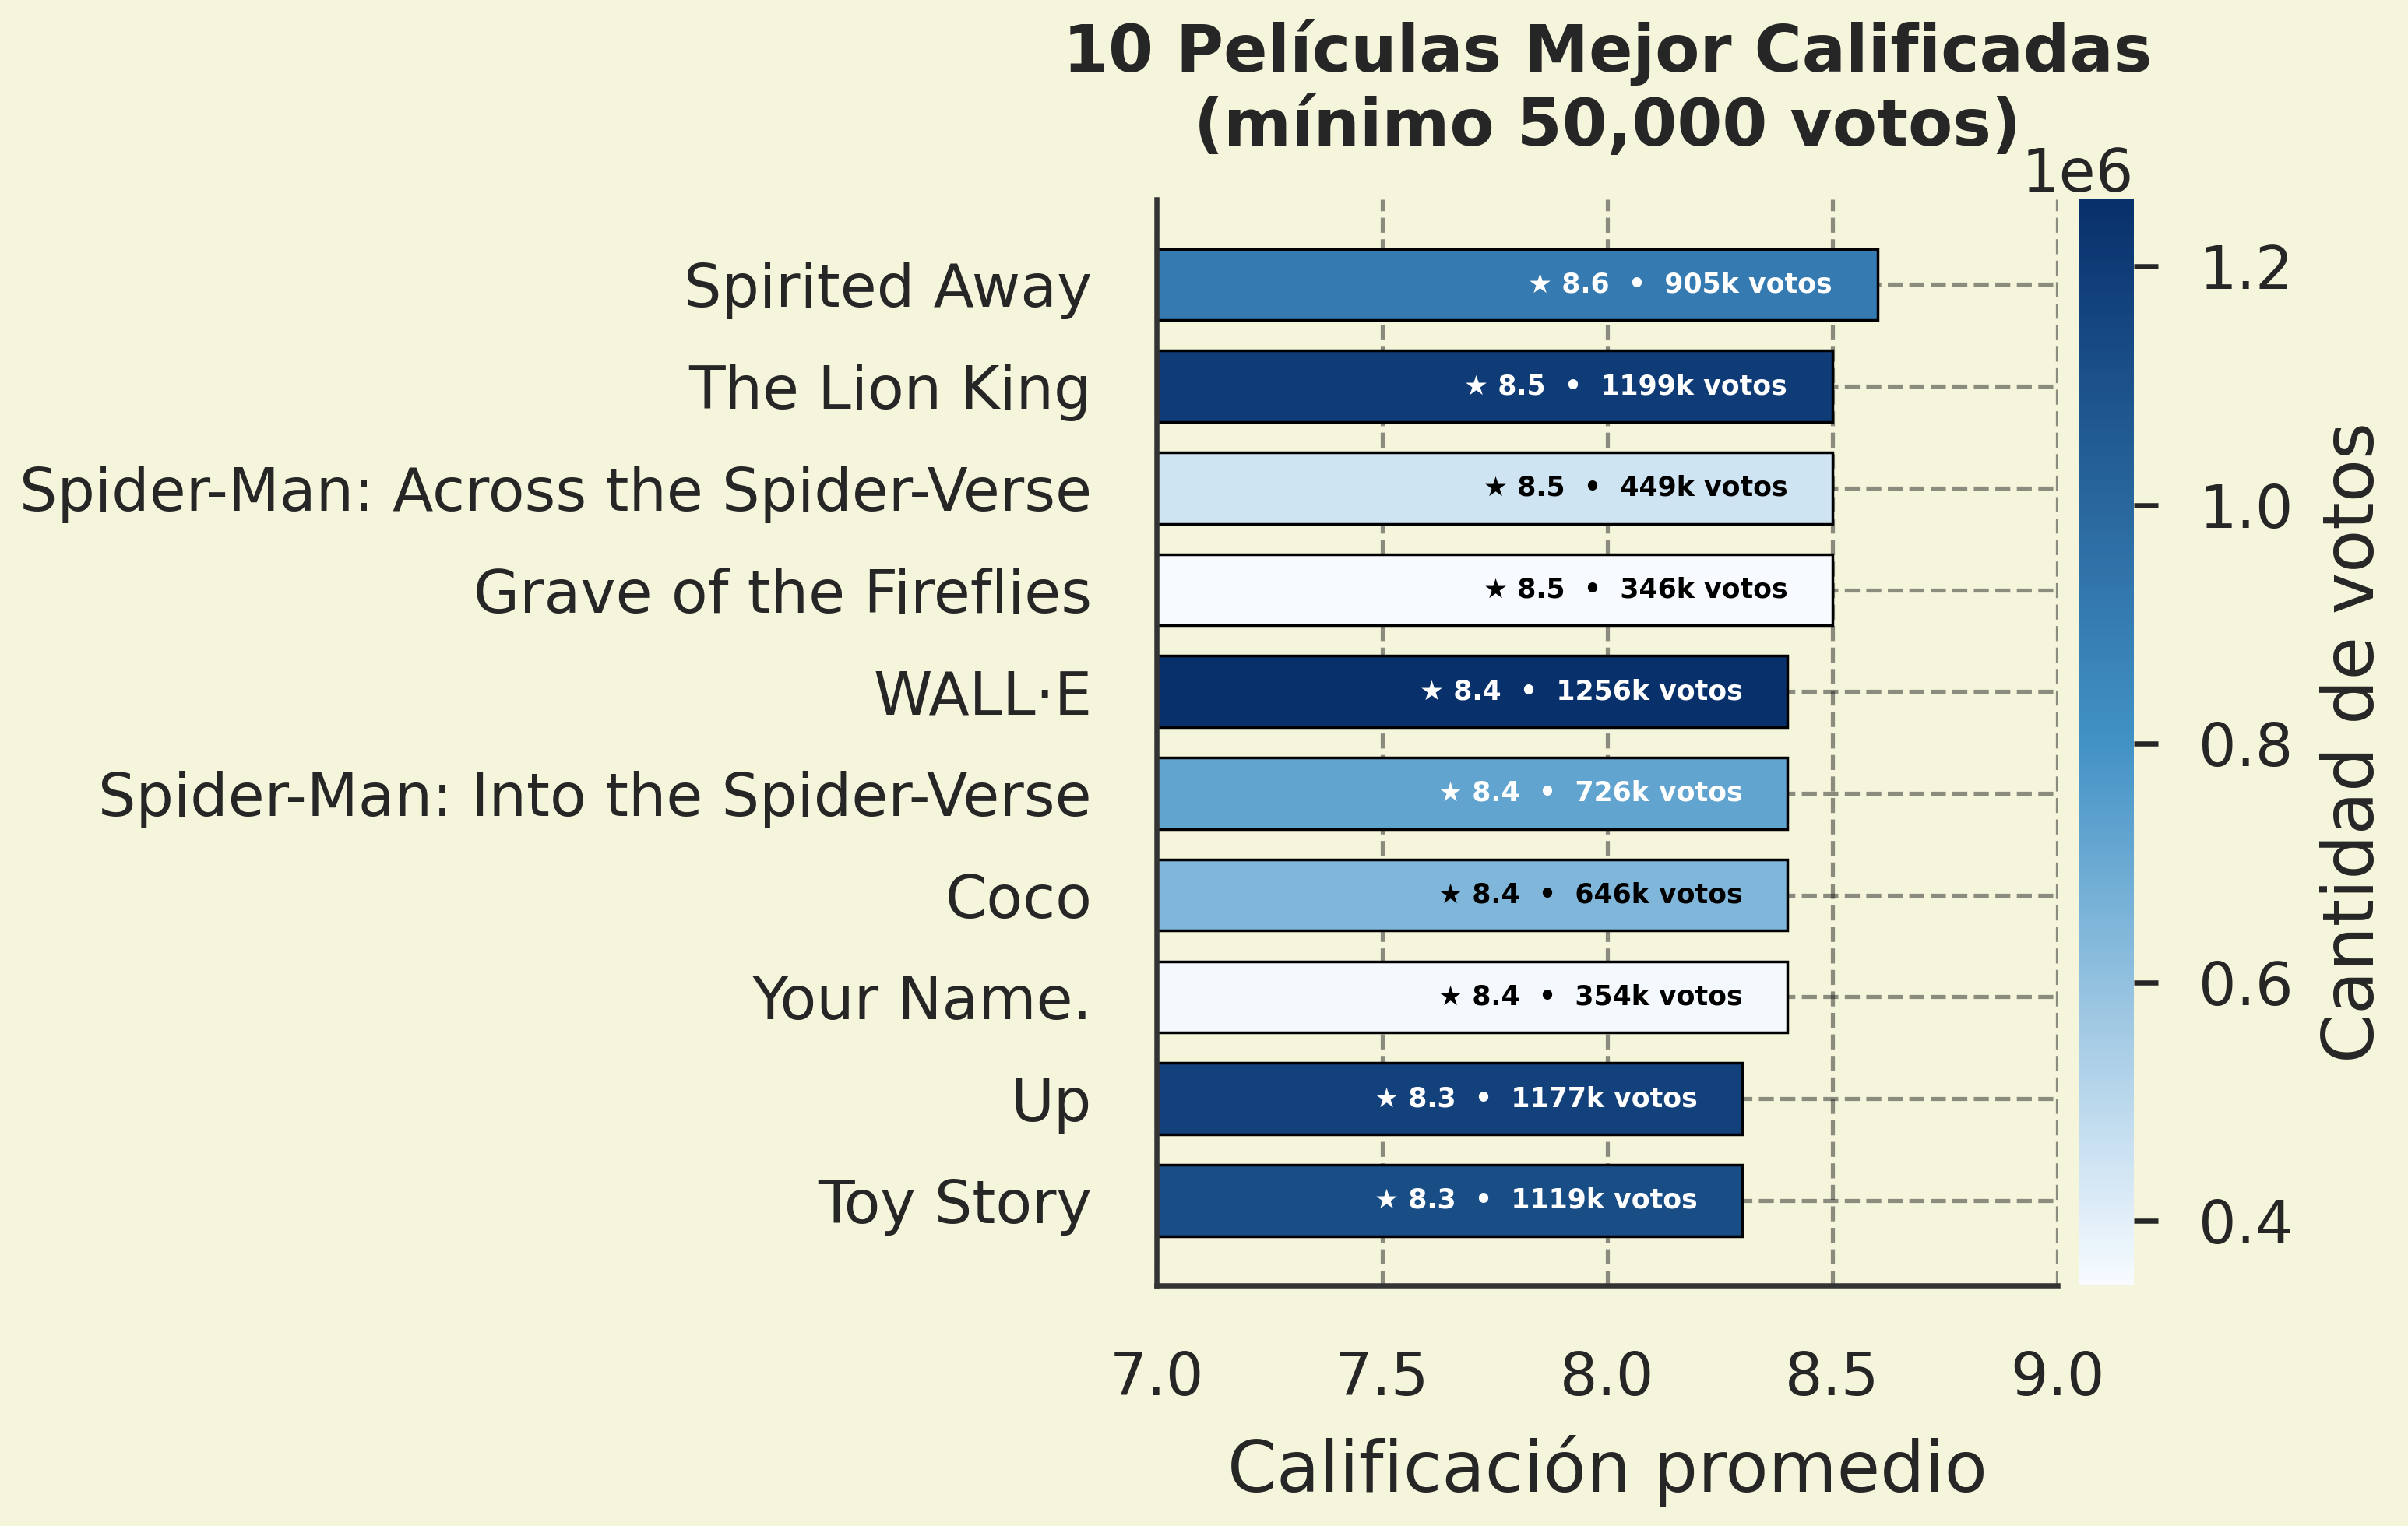

In [8]:
# Conectar a la base de datos
conn = sqlite3.connect("im.db")

# Consulta
query = """
SELECT primaryTitle, averageRating, numVotes
FROM titles
WHERE averageRating IS NOT NULL AND numVotes > 50000
ORDER BY averageRating DESC, numVotes DESC
LIMIT 10
"""

top10_df = pd.read_sql_query(query, conn)
top10_df = top10_df.iloc[::-1].reset_index(drop=True)
conn.close()


# Crear paleta secuencial personalizada
colors = ["#f7fbff", "#4292c6", "#08306b"]  # Azul claro a oscuro
cmap = LinearSegmentedColormap.from_list("custom_blues", colors)
norm = plt.Normalize(top10_df["numVotes"].min(), top10_df["numVotes"].max())

# Configuración de la figura
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Crear barras horizontales
bars = ax.barh(
    top10_df["primaryTitle"],
    top10_df["averageRating"],
    color=cmap(norm(top10_df["numVotes"])),
    height=0.7,
    edgecolor="black",
    linewidth=1
)
# Personalización del gráfico
plt.title("10 Películas Mejor Calificadas\n(mínimo 50,000 votos)", 
          pad=20, fontweight='bold')
plt.xlabel("Calificación promedio", labelpad=10)
plt.ylabel("")
plt.xlim(7, 9)
plt.xticks(np.arange(7, 9.1, 0.5))

# Añadir etiquetas inteligentes
for bar, (_, row) in zip(bars, top10_df.iterrows()):
    # Determinar color de texto basado en luminosidad del fondo
    bar_color = bar.get_facecolor()
    luminance = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]
    text_color = 'black' if luminance > 0.6 else 'white'
    
    # Texto con rating y votos
    ax.text(
        row["averageRating"] - 0.1,
        bar.get_y() + bar.get_height()/2,
        f'★ {row["averageRating"]:.1f}  •  {row["numVotes"]/1000:.0f}k votos',
        ha='right', 
        va='center',
        color=text_color,
        fontweight='bold',
        fontsize=10
    )

# Añadir barra de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Cantidad de votos', labelpad=10)
cbar.outline.set_visible(False)

# Layout final
plt.tight_layout()
plt.show()

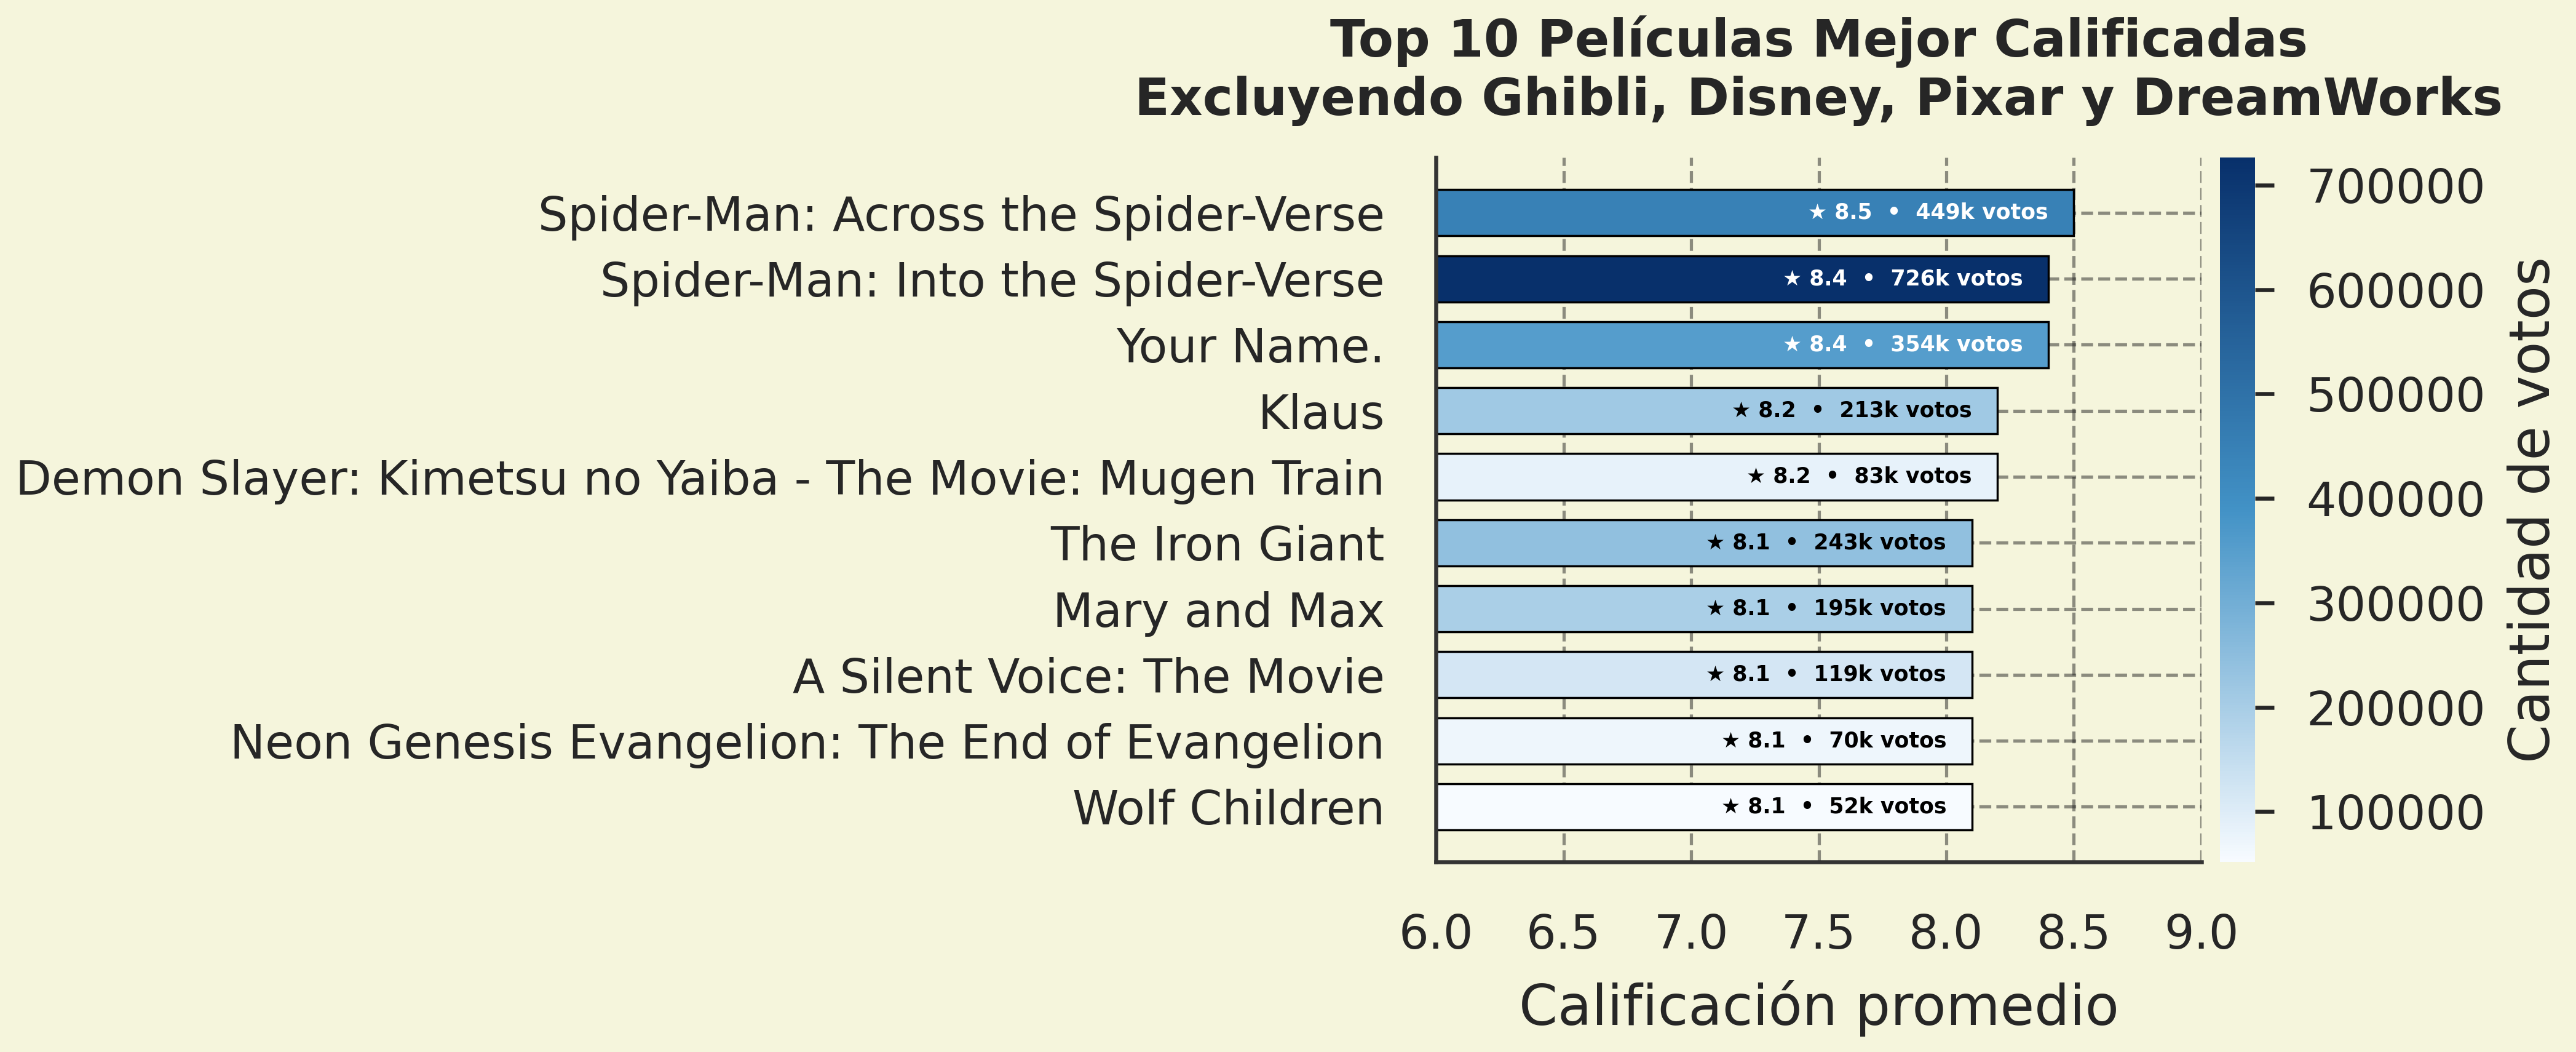

In [9]:
# Unir todas las películas de los estudios en una sola lista
excluded_ttids = GHIBLI + DISNEY + PIXAR + DREAMWORKS

# Conectar a la base de datos
conn = sqlite3.connect("im.db")

# Crear placeholders dinámicos
placeholders = ",".join("?" for _ in excluded_ttids)

# Consulta con exclusión
query = f"""
SELECT primaryTitle, averageRating, numVotes
FROM titles
WHERE averageRating IS NOT NULL
  AND numVotes > 50000
  AND tconst NOT IN ({placeholders})
ORDER BY averageRating DESC, numVotes DESC
LIMIT 10
"""

# Ejecutar consulta
top10_df = pd.read_sql_query(query, conn, params=excluded_ttids)
top10_df = top10_df.iloc[::-1].reset_index(drop=True)
conn.close()

# Paleta personalizada
colors = ["#f7fbff", "#4292c6", "#08306b"]
cmap = LinearSegmentedColormap.from_list("custom_blues", colors)
norm = plt.Normalize(top10_df["numVotes"].min(), top10_df["numVotes"].max())

plt.figure(figsize=(16, 7))
ax = plt.gca()

bars = ax.barh(
    top10_df["primaryTitle"],
    top10_df["averageRating"],
    color=cmap(norm(top10_df["numVotes"])),
    height=0.7,
    edgecolor="black",
    linewidth=1
)

plt.title("Top 10 Películas Mejor Calificadas\nExcluyendo Ghibli, Disney, Pixar y DreamWorks",
          pad=20, fontweight='bold')
plt.xlabel("Calificación promedio", labelpad=10)
plt.ylabel("")
plt.xlim(7, 9)
plt.xticks(np.arange(6, 9.1, 0.5))

# Añadir etiquetas
for bar, (_, row) in zip(bars, top10_df.iterrows()):
    bar_color = bar.get_facecolor()
    luminance = 0.299 * bar_color[0] + 0.587 * bar_color[1] + 0.114 * bar_color[2]
    text_color = 'black' if luminance > 0.6 else 'white'
    
    ax.text(
        row["averageRating"] - 0.1,
        bar.get_y() + bar.get_height()/2,
        f'★ {row["averageRating"]:.1f}  •  {row["numVotes"]/1000:.0f}k votos',
        ha='right', 
        va='center',
        color=text_color,
        fontweight='bold',
        fontsize=10
    )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Cantidad de votos', labelpad=10)
cbar.outline.set_visible(False)

plt.tight_layout()
plt.show()

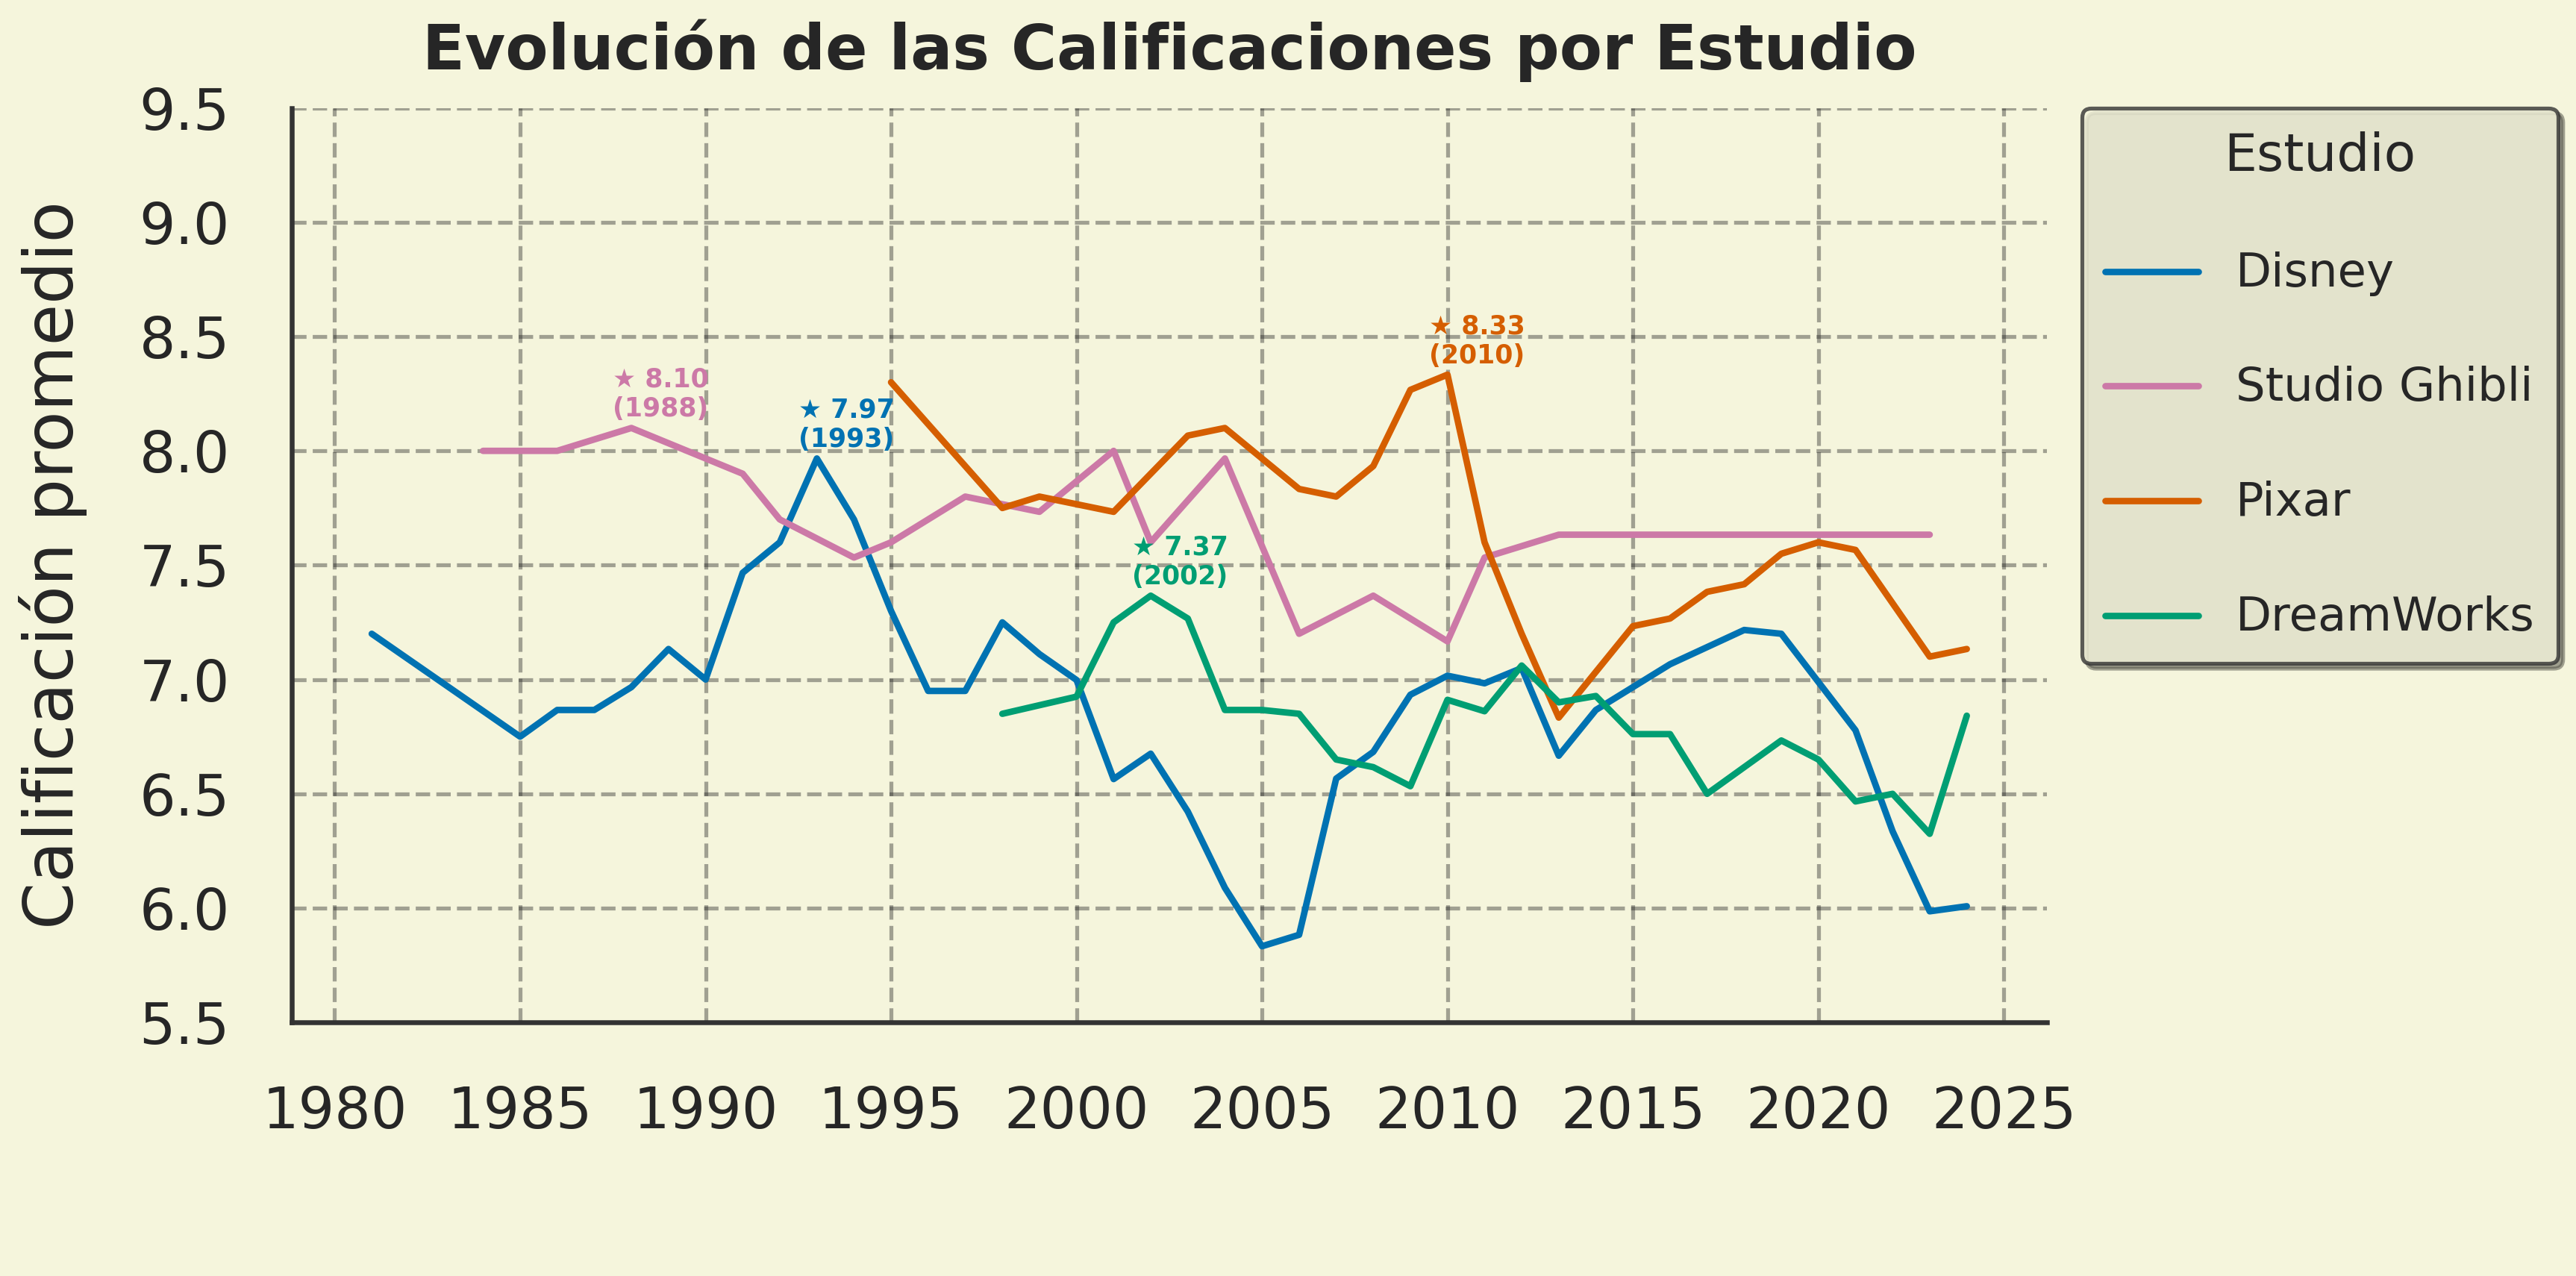

In [10]:
# Cargar años y unir con ratings + estudios
conn = sqlite3.connect("im.db")
years_df = pd.read_sql_query("SELECT tconst, startYear FROM titles WHERE startYear IS NOT NULL", conn)

# Paleta personalizada más contrastante
PALETA_ESTUDIOS = {
    "Disney": "#0072B2",
    "Pixar": "#D55E00",
    "DreamWorks": "#009E73",
    "Studio Ghibli": "#CC79A7"
}

# Crear un DataFrame con los tconst y estudio
def create_company_df(ids, name):
    return pd.DataFrame({"tconst": ids, "studio": name})

all_companies = pd.concat([
    create_company_df(DISNEY, "Disney"),
    create_company_df(PIXAR, "Pixar"),
    create_company_df(DREAMWORKS, "DreamWorks"),
    create_company_df(GHIBLI, "Studio Ghibli")
])

# Cargar datos de la base (título y calificación)
query = """
SELECT tconst, primaryTitle, averageRating
FROM titles
WHERE tconst IN ({seq})
""".format(seq=','.join(['?'] * len(all_companies)))

title_info = pd.read_sql_query(query, conn, params=all_companies['tconst'].tolist())
conn.close()

# Unir con los estudios
merged = pd.merge(title_info, all_companies, on="tconst")

# Eliminar títulos sin rating (por si acaso)
merged = merged.dropna(subset=["averageRating"])

merged_years = pd.merge(merged, years_df, on="tconst")
merged_years["startYear"] = pd.to_numeric(merged_years["startYear"], errors="coerce")
merged_years = merged_years.dropna(subset=["startYear", "averageRating"])
merged_years = merged_years[merged_years["startYear"] >= 1980]

# Calcular promedio por año y estudio
grouped = merged_years.groupby(["startYear", "studio"]).averageRating.mean().reset_index()

# Suavizado por media móvil
grouped["averageSmooth"] = grouped.groupby("studio")["averageRating"].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean())

# Crear figura
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Graficar cada estudio con sombra
for studio in grouped["studio"].unique():
    studio_data = grouped[grouped["studio"] == studio]


    # Línea principal
    sns.lineplot(
        data=studio_data,
        x="startYear",
        y="averageSmooth",
        label=studio,
        color=PALETA_ESTUDIOS[studio],
        linewidth=2.5
    )

        # Anotar el punto más alto
    max_point = studio_data.loc[studio_data["averageSmooth"].idxmax()]
    ax.text(
        max_point["startYear"] - 0.5,
        max_point["averageSmooth"] + 0.05,
        f'★ {max_point["averageSmooth"]:.2f}\n({max_point["startYear"]})',
        color=PALETA_ESTUDIOS[studio],
        weight='bold',
        fontsize=10,
    )


# Ejes
plt.title("Evolución de las Calificaciones por Estudio", pad=15, fontweight='bold',)
plt.xlabel(" ")
plt.ylabel("Calificación promedio")
plt.ylim(5.5, 9.5)

# Eje X con saltos de 5 años
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.tick_params(axis='x')

# Leyenda
plt.legend(title="Estudio", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

C:\Users\cemh0\AppData\Local\Temp\ipykernel_10596\1633207071.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


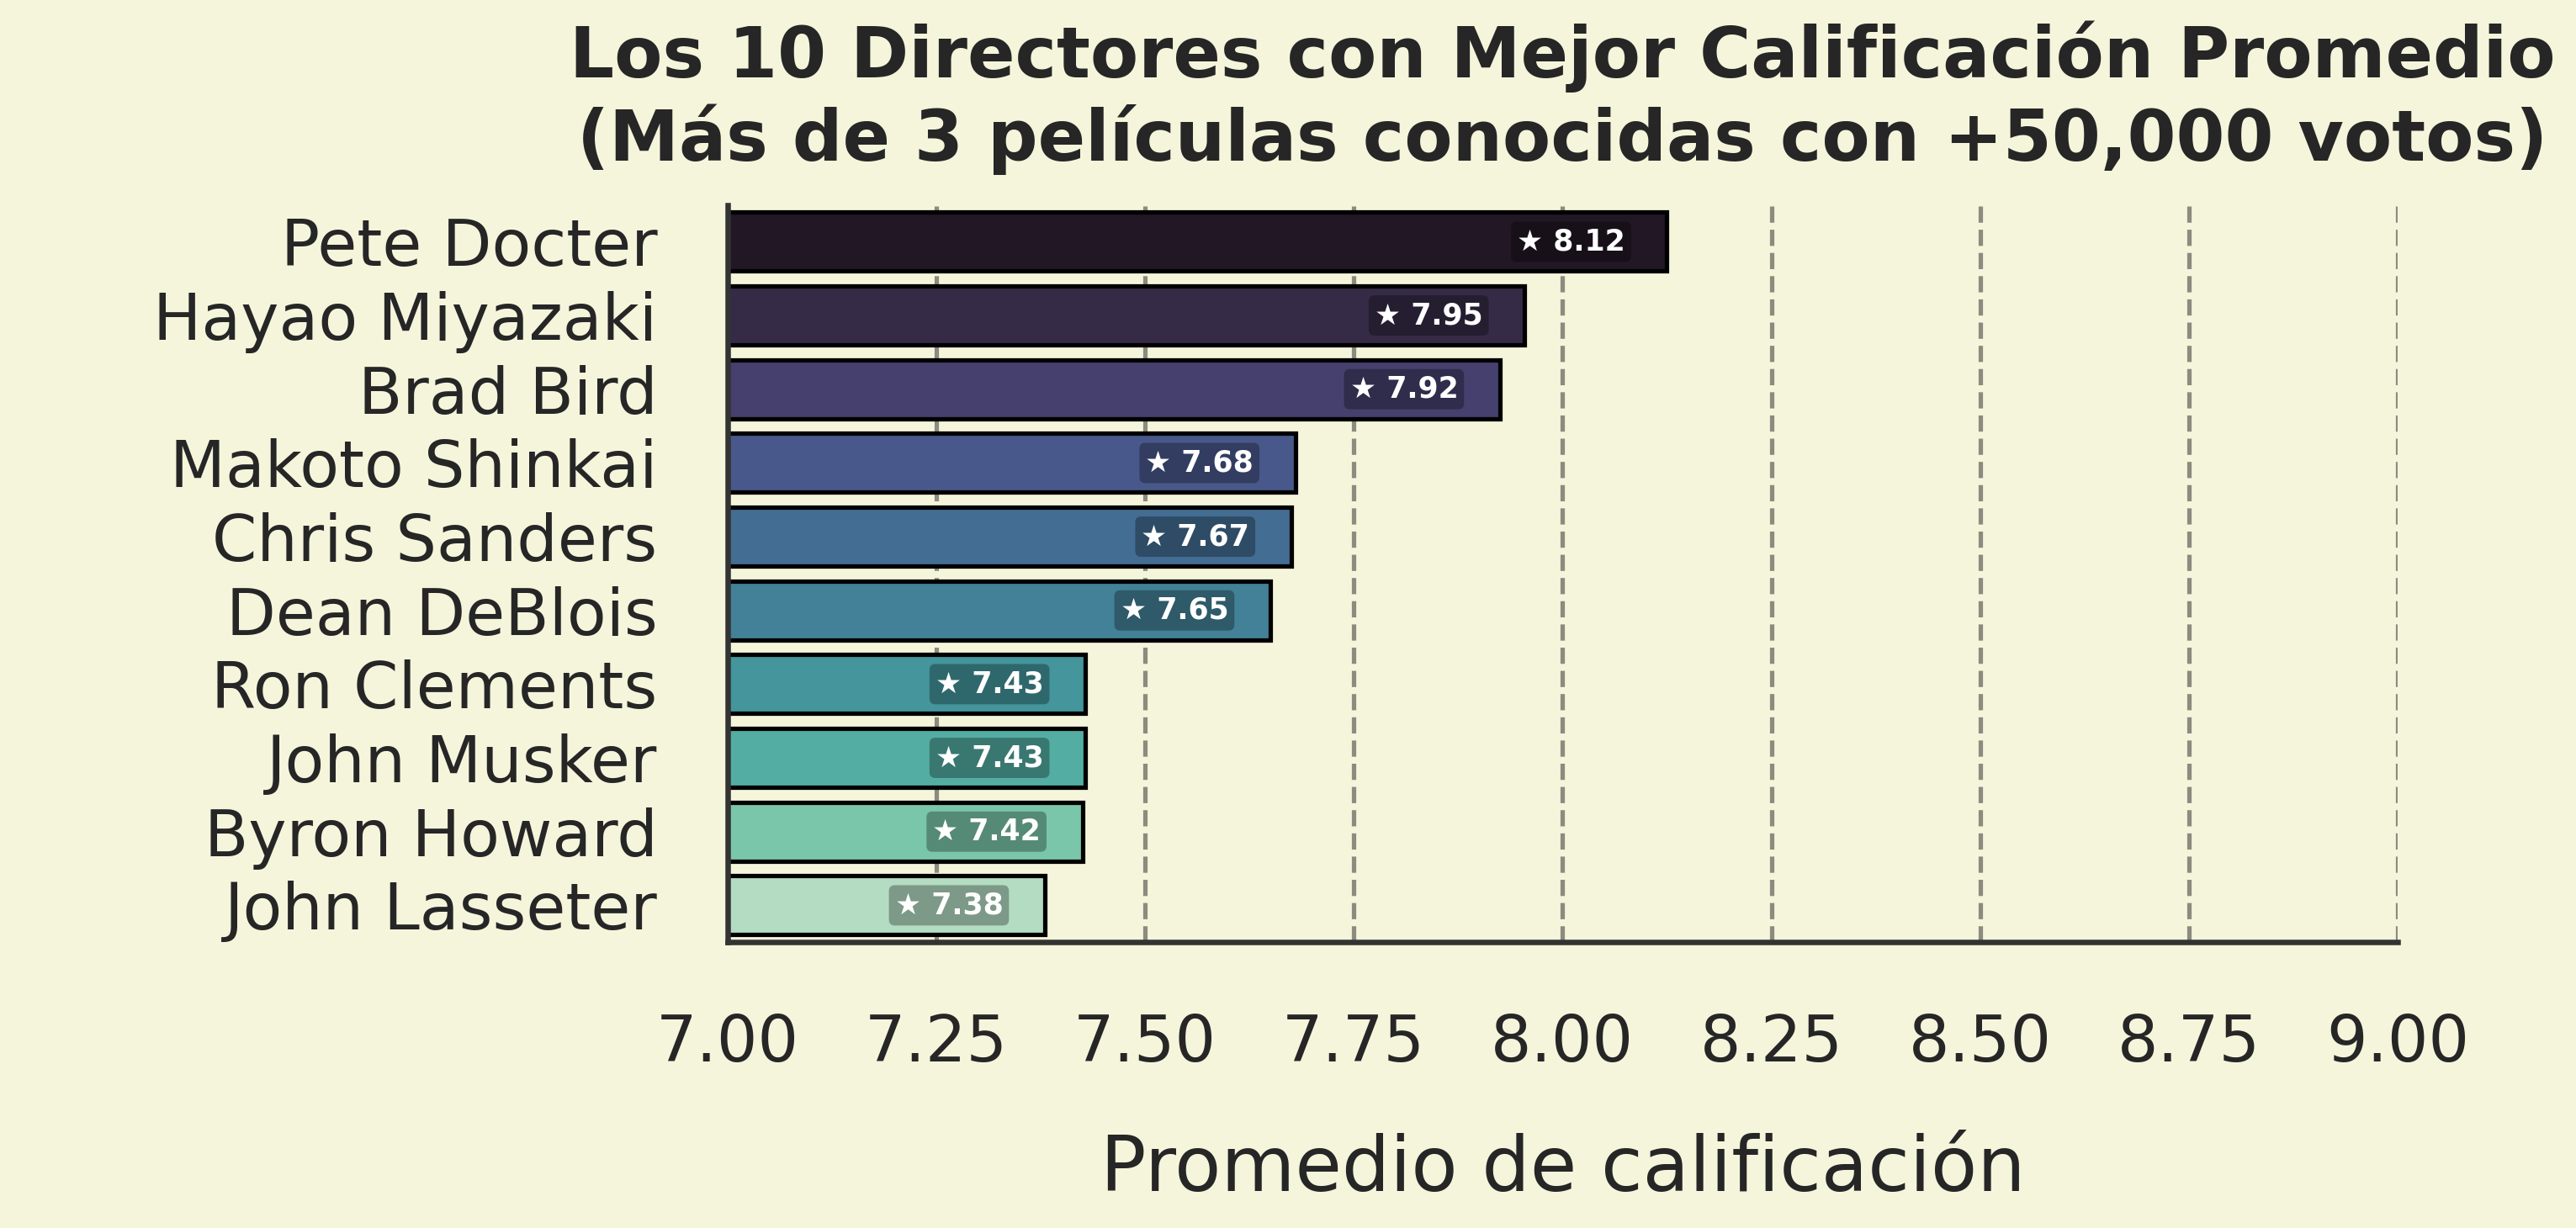

In [11]:
# Conexión a la base de datos
conn = sqlite3.connect("im.db")

# Consulta SQL: películas en known_for, dirigidas por alguien, más de 50,000 votos y promedio
query = """
WITH known_directed AS (
    SELECT DISTINCT k.tconst, r.nconst
    FROM known_for k
    JOIN title_roles r ON k.tconst = r.tconst
    WHERE r.category = 'director'
),
filtered_titles AS (
    SELECT t.tconst, t.primaryTitle, t.averageRating, t.numVotes
    FROM titles t
    WHERE t.averageRating IS NOT NULL AND t.numVotes > 50000
),
combined AS (
    SELECT DISTINCT kd.nconst, p.primaryName, ft.tconst, ft.primaryTitle, ft.averageRating
    FROM known_directed kd
    JOIN filtered_titles ft ON kd.tconst = ft.tconst
    JOIN people p ON kd.nconst = p.nconst
)
SELECT primaryName AS director, COUNT(*) AS num_movies, AVG(averageRating) AS avg_rating
FROM combined
GROUP BY director
HAVING num_movies > 3
ORDER BY avg_rating DESC
LIMIT 10
"""

# Cargar en DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Visualización
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x="avg_rating",
    y="director",
    palette="mako",
    edgecolor="black"
)

plt.title("Los 10 Directores con Mejor Calificación Promedio\n(Más de 3 películas conocidas con +50,000 votos)", fontweight='bold', pad=15)
plt.xlabel("Promedio de calificación")
plt.ylabel(" ")
plt.xlim(7, 9)

# Etiquetas dentro de las barras
for i, row in enumerate(df.itertuples()):
    ax.text(
        row.avg_rating - 0.05,
        i,
        f"★ {row.avg_rating:.2f}",
        ha="right",
        va="center",
        color="white",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.2", edgecolor="none", facecolor="black", alpha=0.3)
    )
sns.despine()
plt.tight_layout()
plt.show()
